# Convergent Migration Models of GJ876

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import rebound as rb
import reboundx as rbx
import time
import migration_sim as mg
from copy import copy
from glob import glob
%matplotlib inline

### Initial configuration. Start the planets outside the 2:1 MMR (~2.4 period ratios)

In [1]:
init_params=[]
init_params.append({'m': .37})
init_params.append({'m': 0.00082, 'rho': 1.04534352444679,'a':0.138,'e':0.01,'inc':0 
                    }) #,'omega':np.deg2rad(176.839),'Omega':np.deg2rad(351.238),'M':np.deg2rad(251.503)})
init_params.append({'m':0.00256,'rho':1.04534352444679,'a': 0.25,'e': 0.01, 'inc':0
                   }) #,'omega': np.deg2rad(157.419),'Omega': np.deg2rad(207.477),'M':np.deg2rad(210.452)})
init_params.append({'m':5.0e-05,'rho':1.04534352444679,'a':0.45 ,'e':0.01,'inc':0 
                   }) #,'omega':np.deg2rad(99.629),'Omega':np.deg2rad(257.996),'M':np.deg2rad(343.739)})

#.45,.25,.138
#.9, .5, .275
# "a": 0.37
# "d": 1.86692890529e-05 0.0218393505695 0.117647076404
# "c": 0.000819877377988 0.135977725208 0.252775297533
# "b": 0.00256199089351 0.218624478036 0.0382920578617
# "e": 5.1297108479e-05 0.348915983756 0.0731667298653

In [107]:
params = {'tau_e': 1e2,
         'K': 10,
         'abrupt': True,
          'integrator':'WHFast',
         'dt': .01}

dtvals=(.008,.003,.001)
def pevolve(dt):
    params = {'tau_e': 1e2,
         'K': 10,
         'abrupt': True,
          'integrator':'WHFast',
         'dt': dt}
    planets=[]
    planets.append({'m': .37})
    planets.append({'m': 0.00082, 'rho': 1.04534352444679,'a':0.138,'e':0.01,'inc':0 })
    planets.append({'m':0.00256,'rho':1.04534352444679,'a': 0.25,'e': 0.01, 'inc':0 }) 
    planets.append({'m':5.0e-05,'rho':1.04534352444679,'a':0.45 ,'e':0.01,'inc':0 }) 
    res,res1,sim = mg.evolve(planets,**params)
    return res,res1

In [150]:
sim = rb.Simulation()
for p in init_params:
    sim.add(**p)
sim.integrator='WHFast'
sim.dt = .004
sim.init_megno()

In [5]:
res = mg.Results(fromfile='results/res_t1000_k10000_d1_a.dat')

In [478]:
reload(mg)

<module 'migration_sim' from 'migration_sim.py'>

In [151]:
sim.integrate(times[-1])
megnf=sim.calculate_megno()

In [633]:
params = {'tau_e': 30., 'tau_a':1e3, 'abrupt':True,'integrator':'ias15','direct':False,'dt':0.01}
Kvals0 = 10**np.linspace(0,3,20)

In [479]:
Kvals0 = 10**np.linspace(0,3,20)
for tau_a in [2.1e2,4.6e2,2.1e3,4.6e3,2.1e4,4.6e4]:
    params['tau_a'] = tau_a
    tevals = tau_a/Kvals
#tevals = np.array([1.0,3.0,30.0,100.0,300.0,1e3])

    for i,te in enumerate(tevals):
        params['tau_e'] = te
        sim = mg.set_sim(init_params,integrator='ias15')
        times = np.linspace(0,10*params['tau_a'],1e3)
        r = mg.Results(times=times,**params)
        temp = mg.run_constant_damping(sim,r,times,tau_e=r.tau_e,
                                   tau_a=r.tau_a,direct=r.direct,stopping_criterion=None)
        temp.save_state('K_results/K%.2f_ta%d.dat'%(temp.tau_a/temp.tau_e,int(temp.tau_a)))
        print 'Finished %d, %d'%(int(tau_a),int(tau_a/te))
    

Two particles had a close encounter (d<exit_min_distance).
Finished 210, 1
Two particles had a close encounter (d<exit_min_distance).
Finished 210, 1
Two particles had a close encounter (d<exit_min_distance).
Finished 210, 2
Two particles had a close encounter (d<exit_min_distance).
Finished 210, 2
Two particles had a close encounter (d<exit_min_distance).
Finished 210, 4
Two particles had a close encounter (d<exit_min_distance).
Finished 210, 6
Finished 210, 8
Finished 210, 12
Finished 210, 18
Finished 210, 26
Finished 210, 37
Finished 210, 54
Finished 210, 78
Finished 210, 112
Finished 210, 162
Two particles had a close encounter (d<exit_min_distance).
Finished 210, 233
Two particles had a close encounter (d<exit_min_distance).
Finished 210, 335
Two particles had a close encounter (d<exit_min_distance).
Finished 210, 483
Finished 210, 695
Two particles had a close encounter (d<exit_min_distance).
Finished 210, 1000
Two particles had a close encounter (d<exit_min_distance).
Finished 4

In [230]:
svals=[]
tvals=[]
for n,r in enumerate(res2):
    try:
        temp = [mg.mod_pi(r.lapvals)[i-50:i].std() for i in range(50,len(mg.mod_pi(r.lapvals)))][-1]
        svals.append(temp)
        tvals.append(tau_a/tevals[n])
    except:
        pass
#svals = np.array([ [mg.mod_pi(r.lapvals)[i-50:i].std() for i in range(50,len(mg.mod_pi(r.lapvals)))][-1] for r in res[:-2]])
svals=np.array(svals)

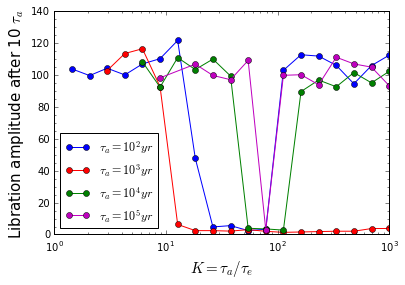

In [231]:
plt.plot(old_tvals1,old_svals1*180/np.pi,'-bo',label='$\\tau_a = 10^2 yr$')
plt.plot(old_tvals,old_svals*180/np.pi,'-ro', label='$\\tau_a = 10^3 yr$')
plt.plot(old_tvals2,old_svals2*180/np.pi,'-go',label='$\\tau_a = 10^4 yr$')
plt.plot(tvals,svals*180/np.pi,'-mo',label='$\\tau_a = 10^5 yr$')
plt.xlabel('$K = \\tau_a/\\tau_e$',fontsize=15)
plt.ylabel('Libration amplitude after 10 $\\tau_a$',fontsize=15)
plt.legend(loc='best')
#plt.ylim(0,180)
plt.xscale('log')
plt.minorticks_on()
plt.savefig('K_results/libration_amp.pdf')
plt.savefig('K_results/libration_amp.png')
plt.savefig('/Users/jupiter/Dropbox/libration_amp.pdf')


In [233]:
for r in res2:
    r.save_state('K_results/K%.2f_ta%d.dat'%(r.tau_a/r.tau_e,int(r.tau_a)))

In [502]:
dvals = np.array([100,2.1e2,4.6e2,1000,2.1e3,4.6e3,10000,2.1e4,4.6e4,100000])
sims = []
fnames=[]
Kvals=np.zeros((len(dvals),20))
tavals=np.zeros((len(dvals),20))
tevals=np.zeros((len(dvals),20))
collvals=np.zeros((len(dvals),20))
lapvals= np.zeros((len(dvals),20))
for i,d in enumerate(dvals):
    fname = [f for f in glob('K_results/*ta%d.dat'%d)]
    fnames.append(fname)
    temp=[mg.Results(fromfile=f) for f in glob('K_results/*ta%d.dat'%d)]
    sims.append(temp)
    Kvals[i,:] = [s.tau_a/s.tau_e for s in temp]
    tavals[i,:] = [np.abs(s.tau_a) for s in temp]
    tevals[i,:] = [np.abs(s.tau_e) for s in temp]
    cvals = [ int( bool(s.collision) or bool(s.ejection)) for s in temp]
    ltemp=[]
    for r,c in zip(temp,cvals):
        if not c:
            ltemp.append(np.rad2deg([mg.mod_pi(r.lapvals)[j-50:j].std() for j in range(50,len(mg.mod_pi(r.lapvals)))][-1]))
        else:
            ltemp.append(180.0)
    lapvals[i,:] = ltemp
    collvals[i,:] = cvals
sims = np.array(sims)
#Kvals = np.array(Kvals)
#tavals = np.array(tavals)
#tevals = np.array(tevals)
#collvals = np.array(collvals)
#lapvals = np.array(lapvals)
ind = collvals.astype(bool)
# Kvals = np.array([s.tau_a/s.tau_e for s in ta3])
# ta3 = ta3[np.argsort(Kvals)]

# Kvals = Kvals[np.argsort(Kvals)]

In [672]:
for i in range(len(dvals)):
    ind1 = np.argsort(Kvals[i,:])
    Kvals[i,:] = Kvals[i,:][ind1]
    tevals[i,:] = tevals[i,:][ind1]
    tavals[i,:] = tavals[i,:][ind1]
    lapvals[i,:] = lapvals[i,:][ind1]
    collvals[i,:] = collvals[i,:][ind1]
    sims[i,:] = sims[i,:][ind1]
    

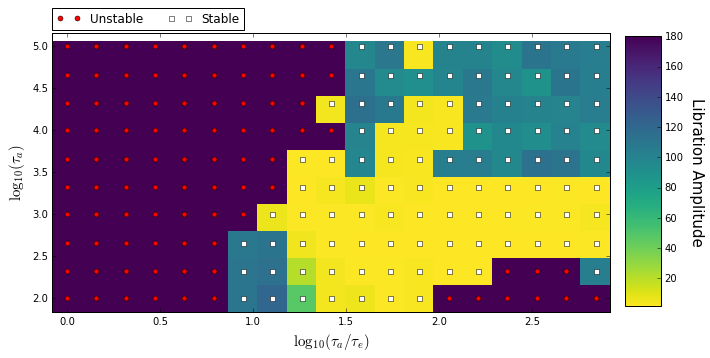

In [757]:
kargs = {'cmap':'viridis_r','shading':'gourard'}
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
img=ax.pcolormesh(x2,y2,lapvals,**kargs); 
# ax.set_xticks(np.arange(xmin,xmax,dx))
# ax.set_yticks(np.arange(ymin,ymax,dy))
ax.set_xlabel('$\\log_{10}(\\tau_a/\\tau_e)$',fontsize=15)
ax.set_ylabel('$\\log_{10}(\\tau_a)$',fontsize=15)
cbar_ax = fig.add_axes([.92, 0.14, 0.05, .75])
fig.colorbar(img, cax=cbar_ax)
cbar_ax.set_ylabel('Libration Amplitude',rotation=270,fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=.05)

ind1 = ind&(~np.isclose(Kvals,1e3))
ind2 = (~ind)&(~np.isclose(Kvals,1e3))
line1, = ax.plot(np.log10(Kvals[ind1]),np.log10(tavals[ind1]),'ro',markersize=5,label='Unstable')
line2, = ax.plot(np.log10(Kvals[ind2]),np.log10(tavals[ind2]),'ws',markersize=5,label='Stable')
plt.figlegend((line1,line2),('Unstable','Stable'),'upper center', 
              ncol=2,bbox_to_anchor=(.205, .99),fancybox=False)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# # Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
#           fancybox=True, shadow=True, ncol=5)
ax.set_xlim(-dx/2,3-dx/2)
ax.set_ylim(2-dy/2,5+dy/2)
plt.savefig('K_results/libration_amp2d.pdf')
plt.savefig('K_results/libration_amp2d.png')
plt.savefig('/Users/jupiter/Dropbox/libration_amp2d.pdf')
#lt.xlim(-,3.1)

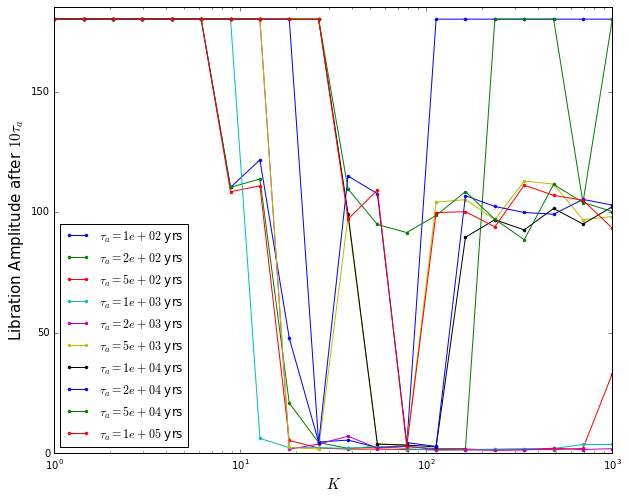

In [578]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for d in dvals:
    ind1 = tavals == d
    ind2 = np.argsort(Kvals[ind1])
    ax.plot(Kvals[ind1][ind2],lapvals[ind1][ind2],'.-',label='$\\tau_a = %.e$ yrs'%d)

ax.set_xscale('log')
ax.set_xlabel('$K$',fontsize=15)
ax.set_ylabel('Libration Amplitude after $10 \\tau_a$',fontsize=15)
ax.set_ylim(0,185)
ax.legend(loc='best')

In [696]:
xmin = np.log10(Kvals0).min()
xmax = np.log10(Kvals0).max()
dx = np.log10(Kvals0[1])-np.log10(Kvals0[0])
xmin = np.log10(Kvals0/dvals).min()
xmax = np.log10(Kvals0/dvals).max()
dx = np.log10(Kvals0[1])-np.log10(Kvals0[0])
ymin = np.log10(dvals).min()
ymax = np.log10(dvals).max()
dy = np.log10(dvals[1])-np.log10(dvals[0])
x2,y2 = np.meshgrid(np.arange(xmin,xmax+dx,dx)-dx/2.,np.arange(ymin,ymax+dy,dy)-dy/2.)

In [702]:
np.arange(xmin,xmax+dx,dx)-dx/2, np.log10(Kvals0)

(array([-0.07894737,  0.07894737,  0.23684211,  0.39473684,  0.55263158,
         0.71052632,  0.86842105,  1.02631579,  1.18421053,  1.34210526,
         1.5       ,  1.65789474,  1.81578947,  1.97368421,  2.13157895,
         2.28947368,  2.44736842,  2.60526316,  2.76315789,  2.92105263]),
 array([ 0.        ,  0.15789474,  0.31578947,  0.47368421,  0.63157895,
         0.78947368,  0.94736842,  1.10526316,  1.26315789,  1.42105263,
         1.57894737,  1.73684211,  1.89473684,  2.05263158,  2.21052632,
         2.36842105,  2.52631579,  2.68421053,  2.84210526,  3.        ]))

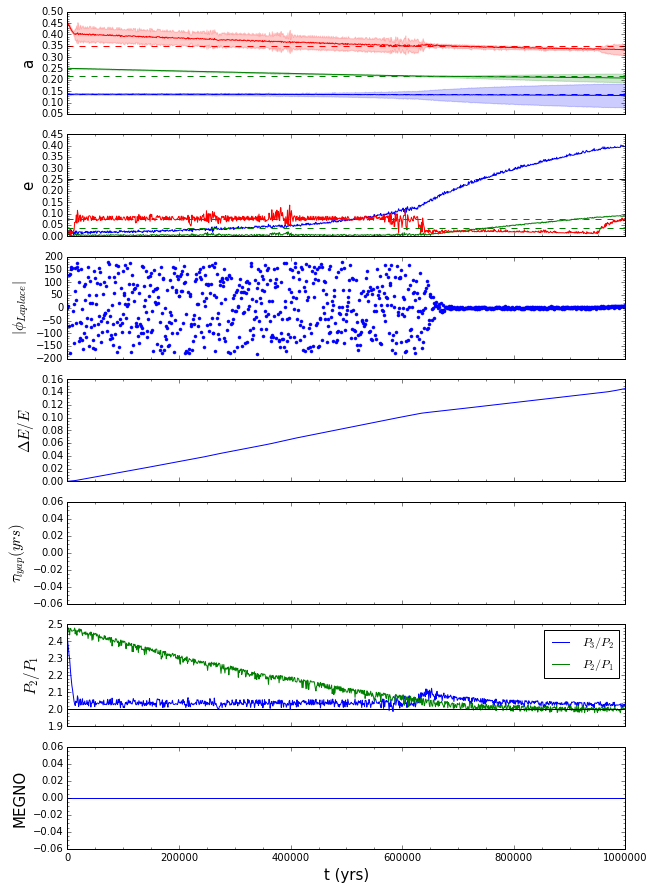

In [760]:
sims[-1,-8].plot()

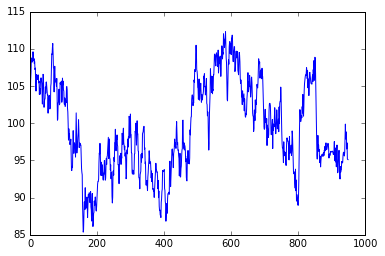

In [622]:
plt.plot(temp)

In [299]:
n = 3
npoints = 50
lap = np.rad2deg(mg.mod_pi(res[n].lapvals))
mvals = np.array([lap[i-npoints:i].mean() for i in range(npoints,len(lap))])
svals = np.array([lap[i-npoints:i].std() for i in range(npoints,len(lap))])
tvals = res[n].times[range(npoints,len(lap))]/res[n].tau_a
times2 = res[n].times/res[n].tau_a

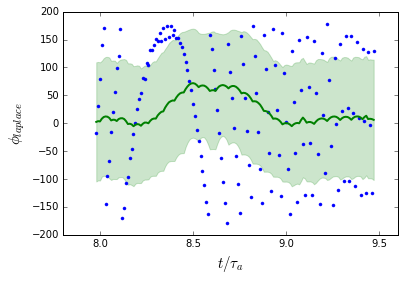

In [191]:
ind = npoints*3
plt.plot(times2[-ind:],lap[-ind:],'.')
plt.plot(tvals[-ind:],mvals[-ind:],linewidth=2)
#plt.plot(tvals[-300:],svals[-300:],linewidth=1)
plt.fill_between(tvals[-ind:],(mvals-svals)[-ind:],(mvals+svals)[-ind:],color='g',alpha=.2)
plt.xlabel('$t/\\tau_a$',fontsize=15)
plt.ylabel('$\\phi_{laplace}$',fontsize=15)

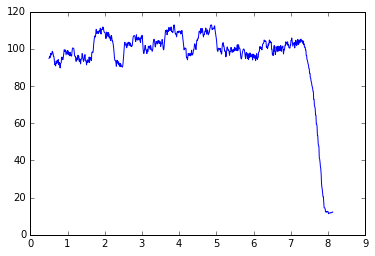

In [131]:
plt.plot(tvals,np.rad2deg(svals))

In [305]:
Kvals = np.array([1.0,3.0,1e1,3e1,1e2,3e2])
Tvals = np.array([1e2,3e2,1e3,3e3,1e4,3e4])
integrators = ['WHFast','ias15']


In [307]:
t0 = time.time()
i=1
tot = len(Kvals)*len(Tvals)*len(integrators)
for k in Kvals:
    for t in Tvals:
        for integ in integrators:
            params = {'tau_e': t,'K': k,'abrupt': True,'integrator': integ,'dt': .001}
            fname='results/res_t%d_k%d_%s'%(params['tau_e'],params['K'],params['integrator'].lower()[0])
            print 'Working on %d out of %d, %s'%(i,tot,fname)  
            res,res1,sim=evolve(**params)
            res.save_state(fname=fname+'_a.dat')
            res1.save_state(fname=fname+'_b.dat')
            sim.save(fname + '_s.dat')
            i += 1
            
total_time = time.time()-t0

Working on 1 out of 72, results/res_t100_k1_w
Finished before stopping criterion was met!
Working on 2 out of 72, results/res_t100_k1_i
Finished before stopping criterion was met!
Working on 3 out of 72, results/res_t300_k1_w
Stoping run at t=6774.774775, stopping criterion met.
Working on 4 out of 72, results/res_t300_k1_i
Finished before stopping criterion was met!
Working on 5 out of 72, results/res_t1000_k1_w
Stoping run at t=9459.459459, stopping criterion met.
Working on 6 out of 72, results/res_t1000_k1_i
Stoping run at t=10060.060060, stopping criterion met.
Working on 7 out of 72, results/res_t3000_k1_w
Stoping run at t=9459.459459, stopping criterion met.
Working on 8 out of 72, results/res_t3000_k1_i
Stoping run at t=10450.450450, stopping criterion met.
A particle escaped (r>exit_max_distance).
Working on 9 out of 72, results/res_t10000_k1_w
Stoping run at t=9609.609610, stopping criterion met.
Working on 10 out of 72, results/res_t10000_k1_i
Stoping run at t=13513.513514, 

In [308]:
print 'Total Time %.2f hrs'%(total_time/(60*60))

Total Time 6.15 hrs


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:108: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:109: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:110: RuntimeWarning: invalid value encountered in divide


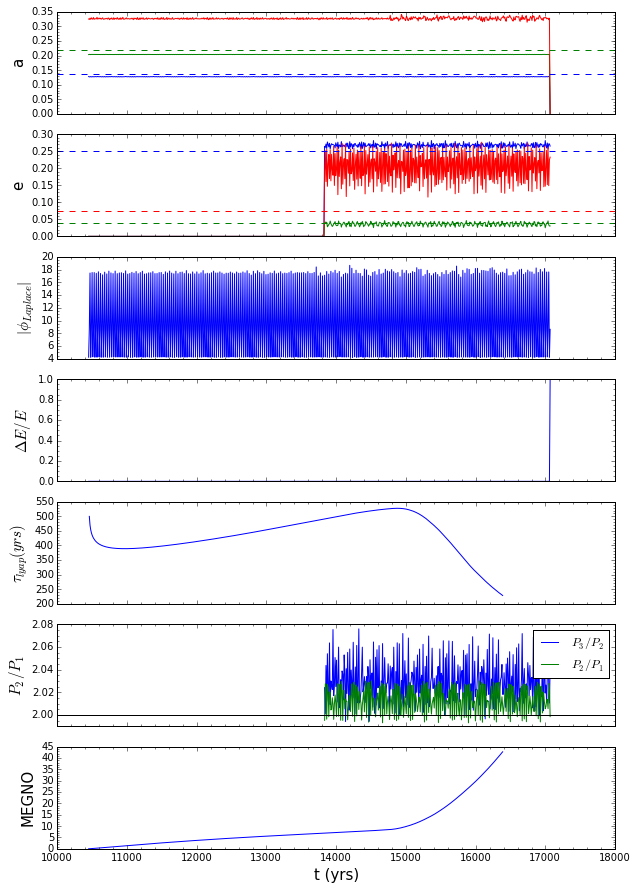

In [322]:
Results(fromfile='results/res_t1000_k3_i_b.dat').plot()

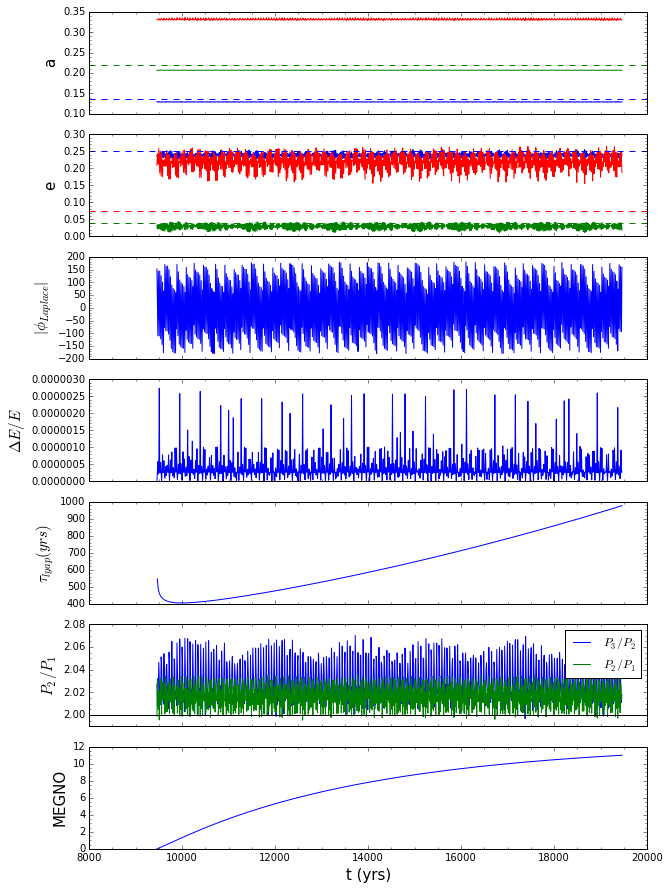

In [323]:
Results(fromfile='results/res_t1000_k3_w_b.dat').plot()

In [324]:
fname_list = []
for k in Kvals:
    for t in Tvals:
        for integ in integrators:
            params = {'tau_e': t,'K': k,'abrupt': True,'integrator': integ,'dt': .001}
            fname_list.append('results/res_t%d_k%d_%s'%(params['tau_e'],params['K'],params['integrator'].lower()[0]))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:110: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:111: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:112: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:105: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:105: RuntimeWarning: invalid value encountered in absolute
/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  edgecolor=None,  # defaults to rc figure.edgecolor


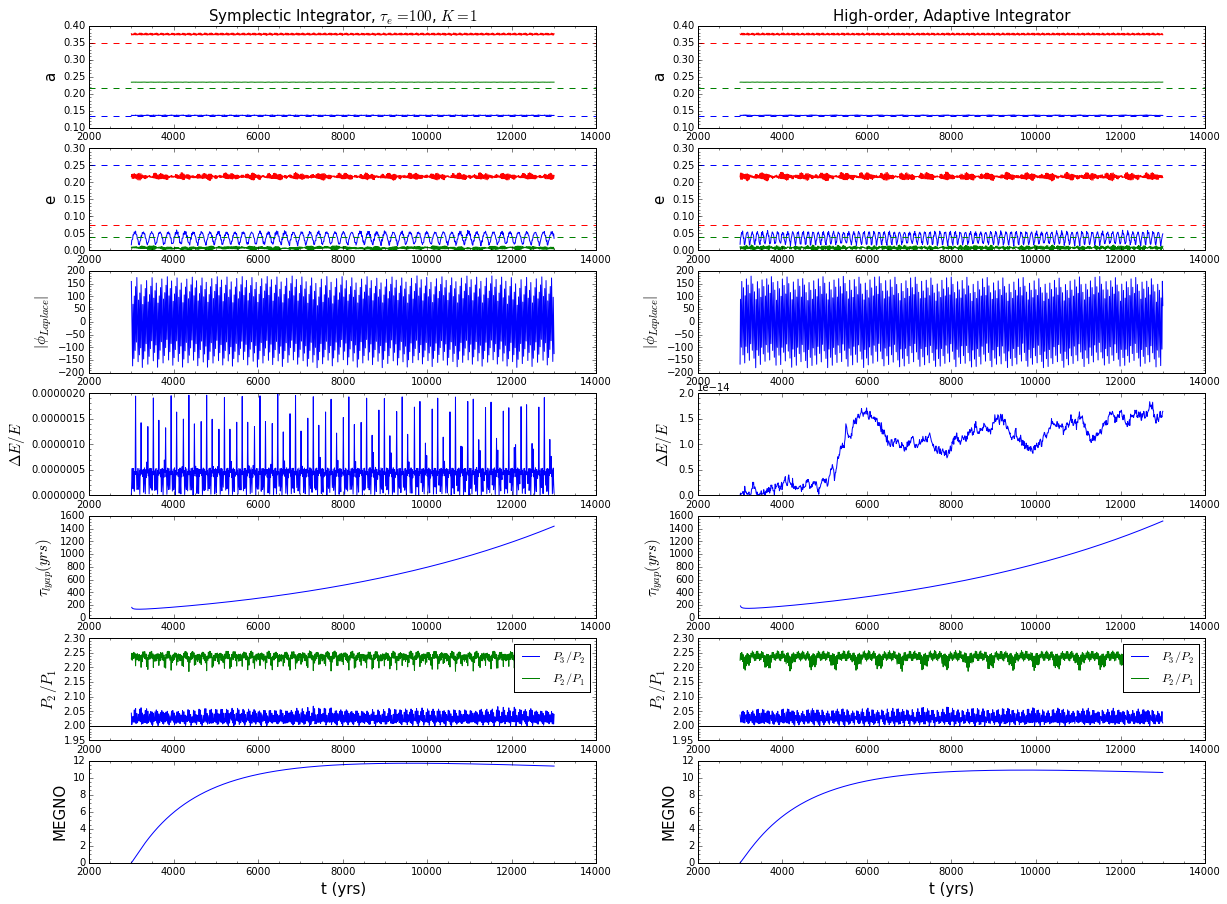

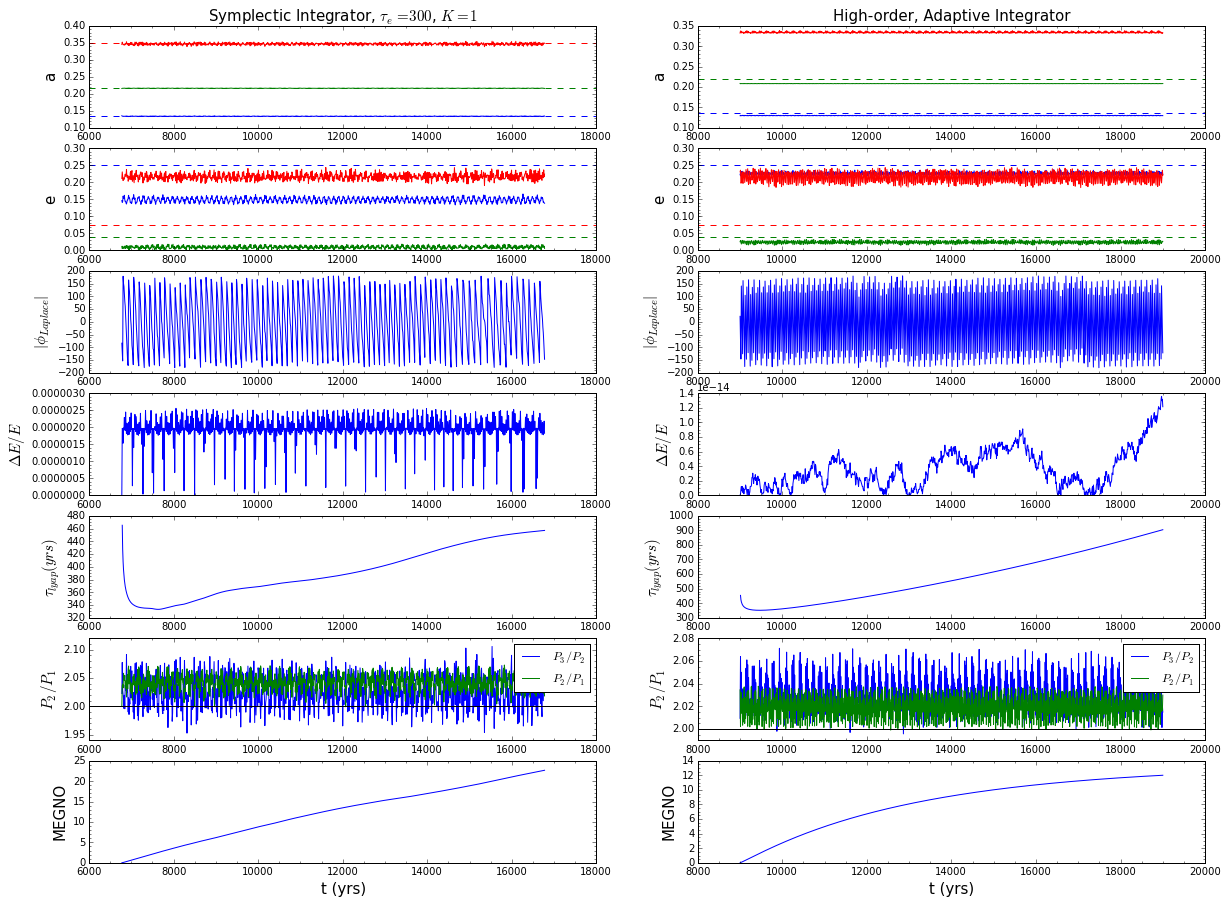

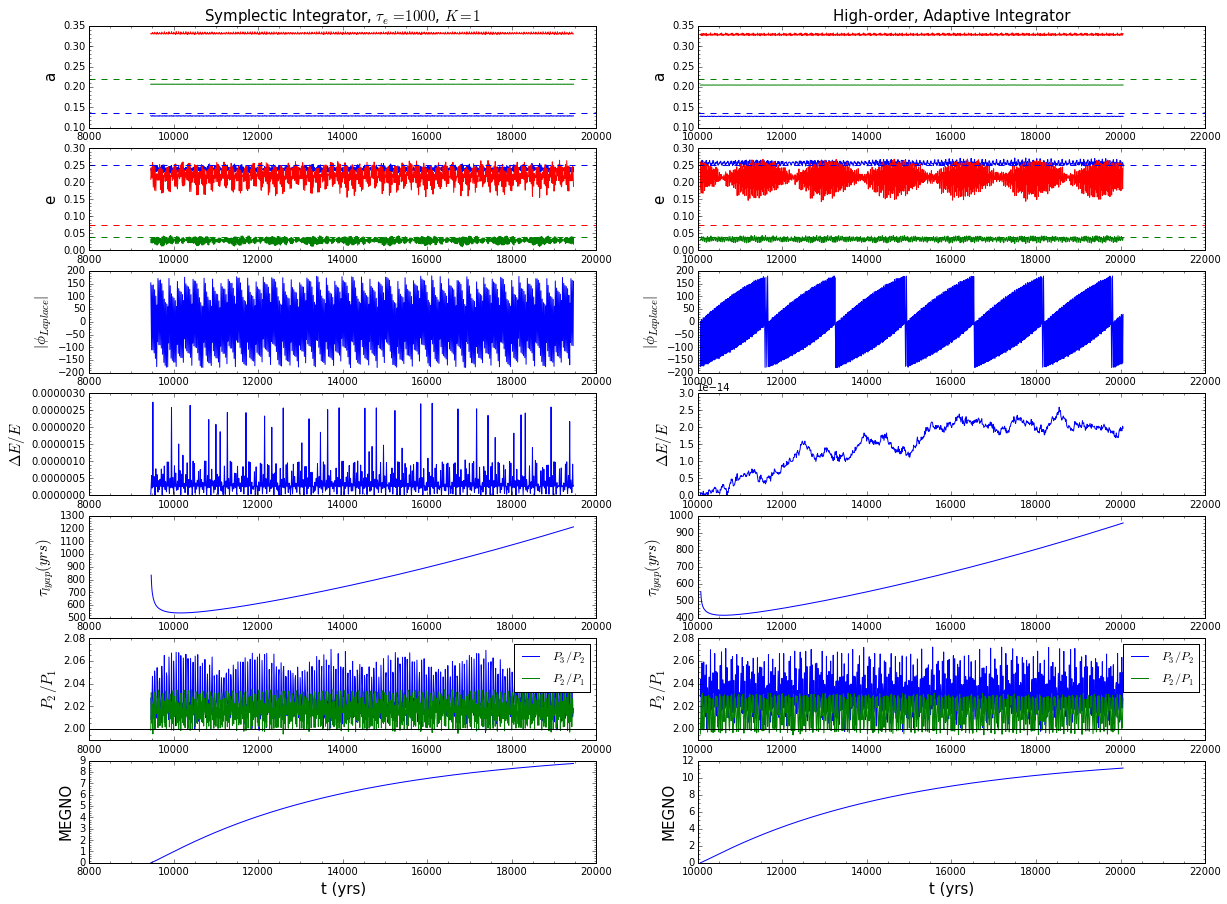

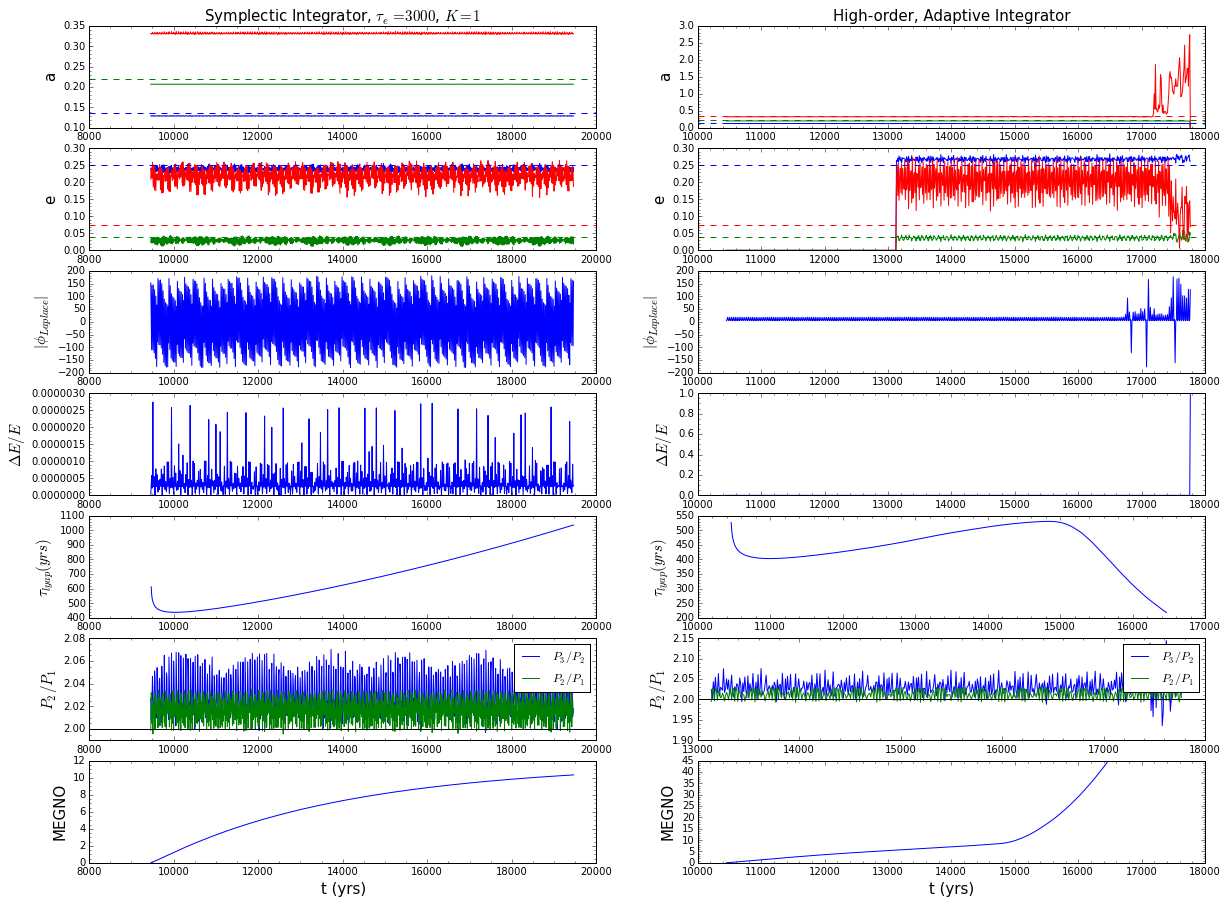

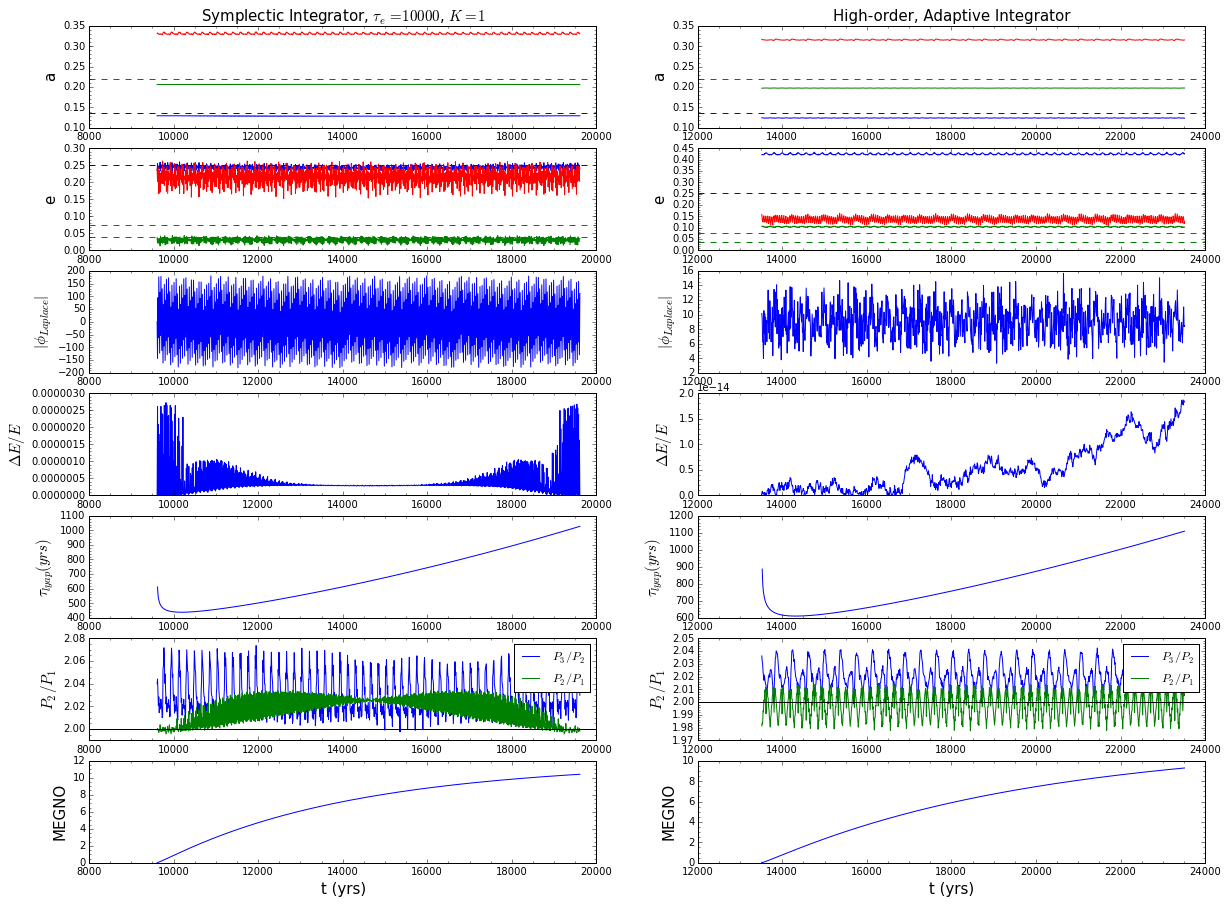

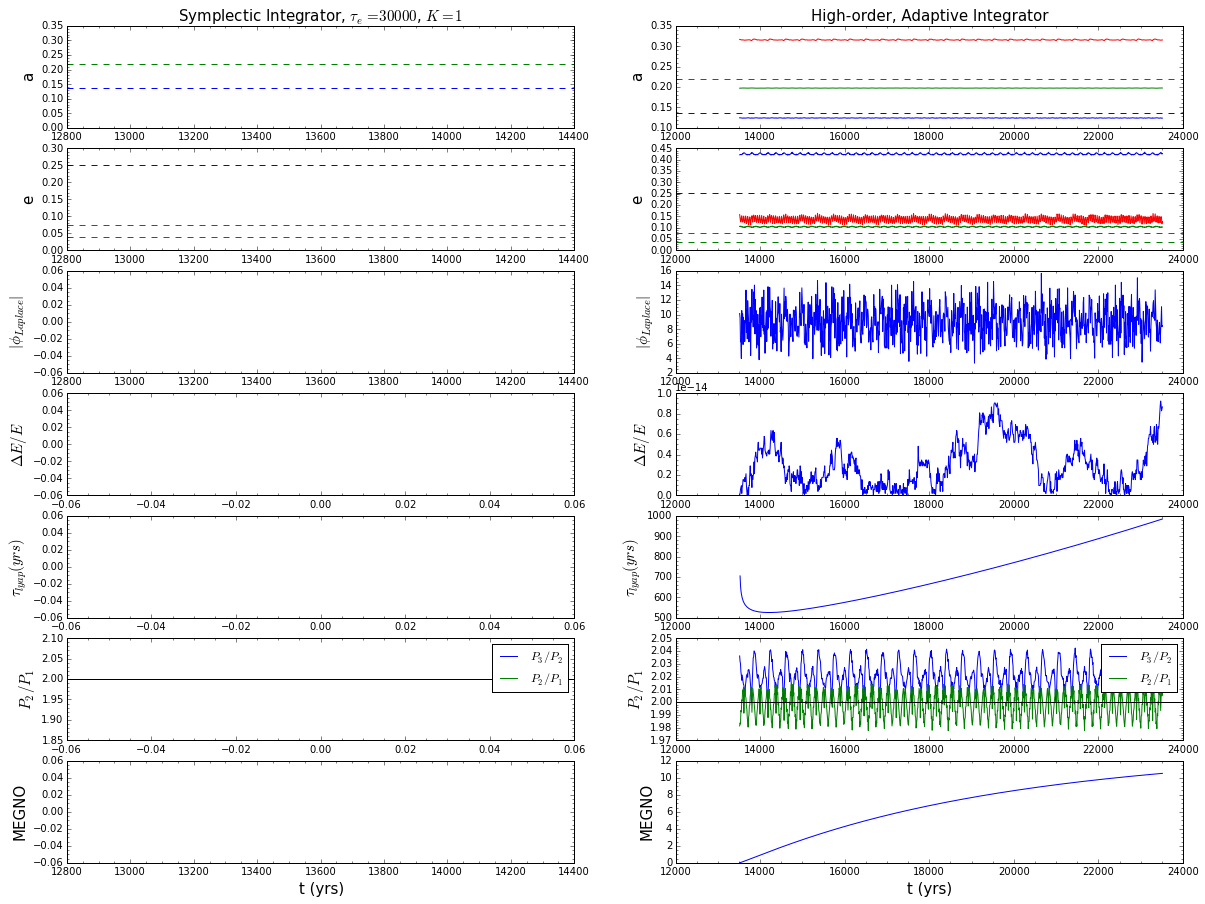

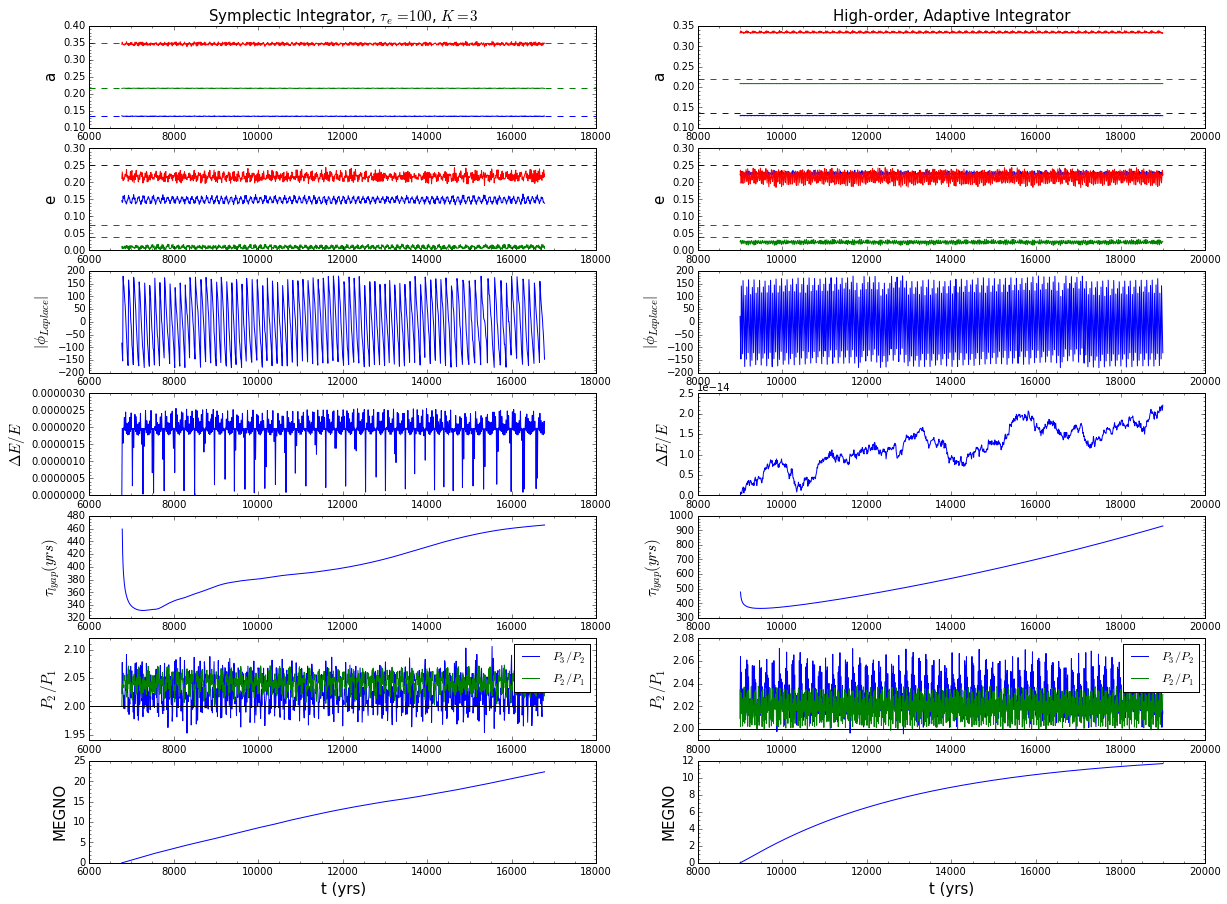

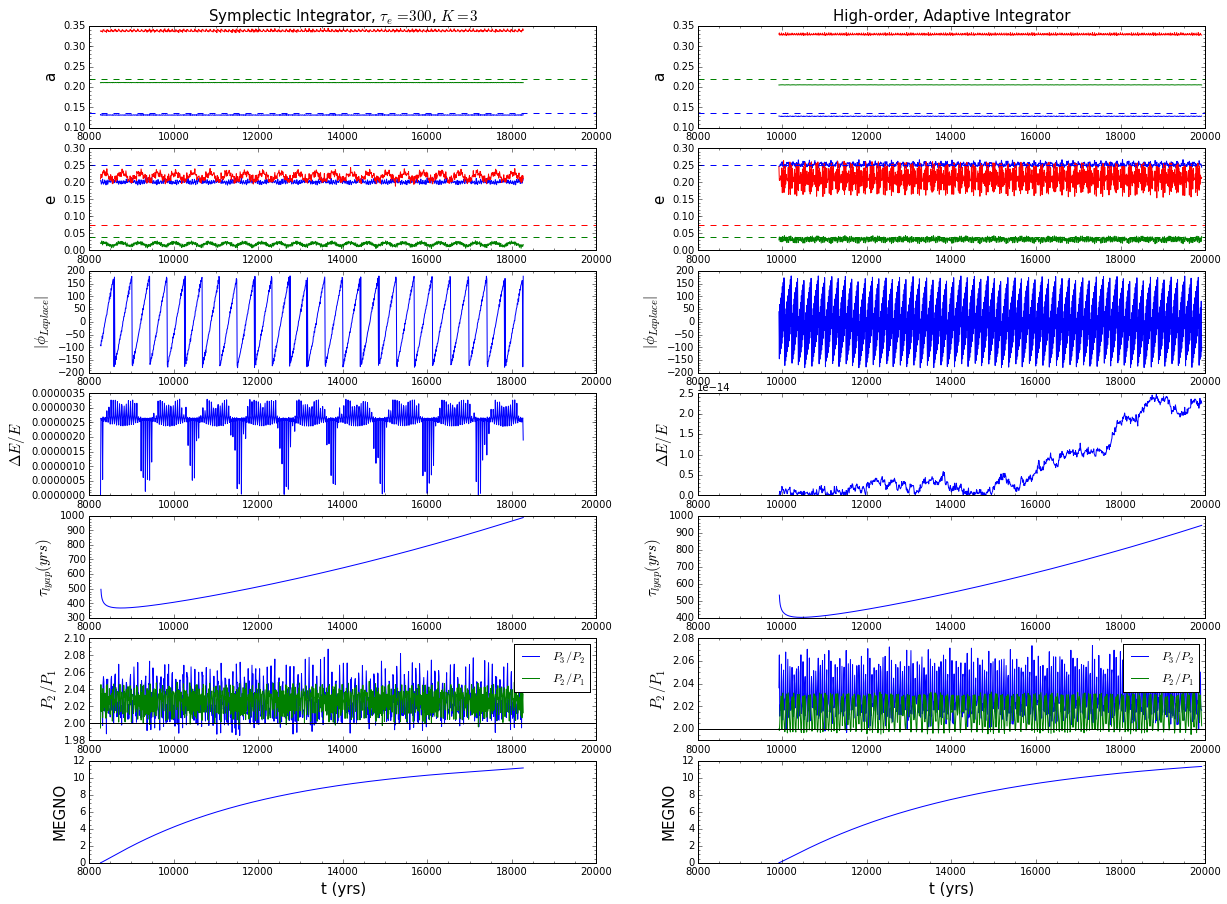

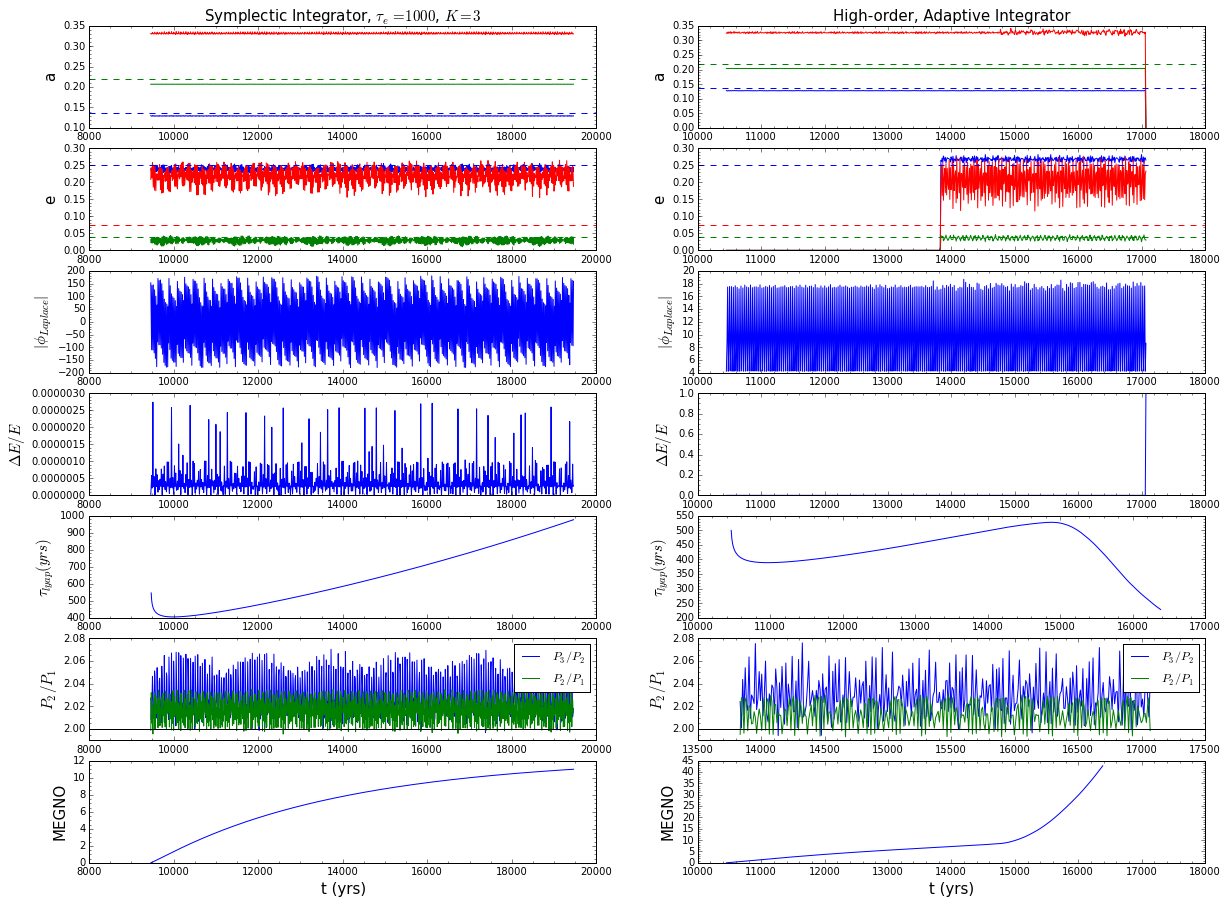

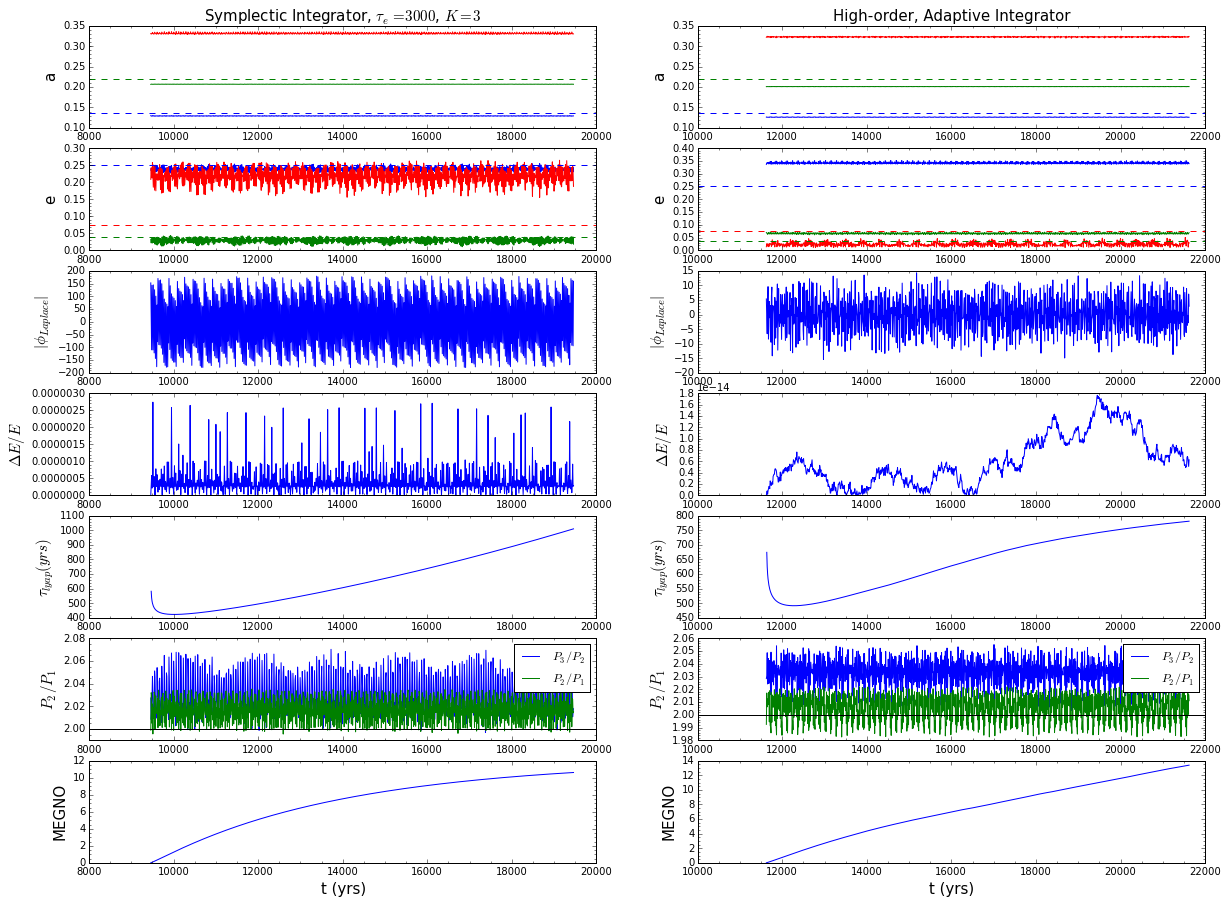

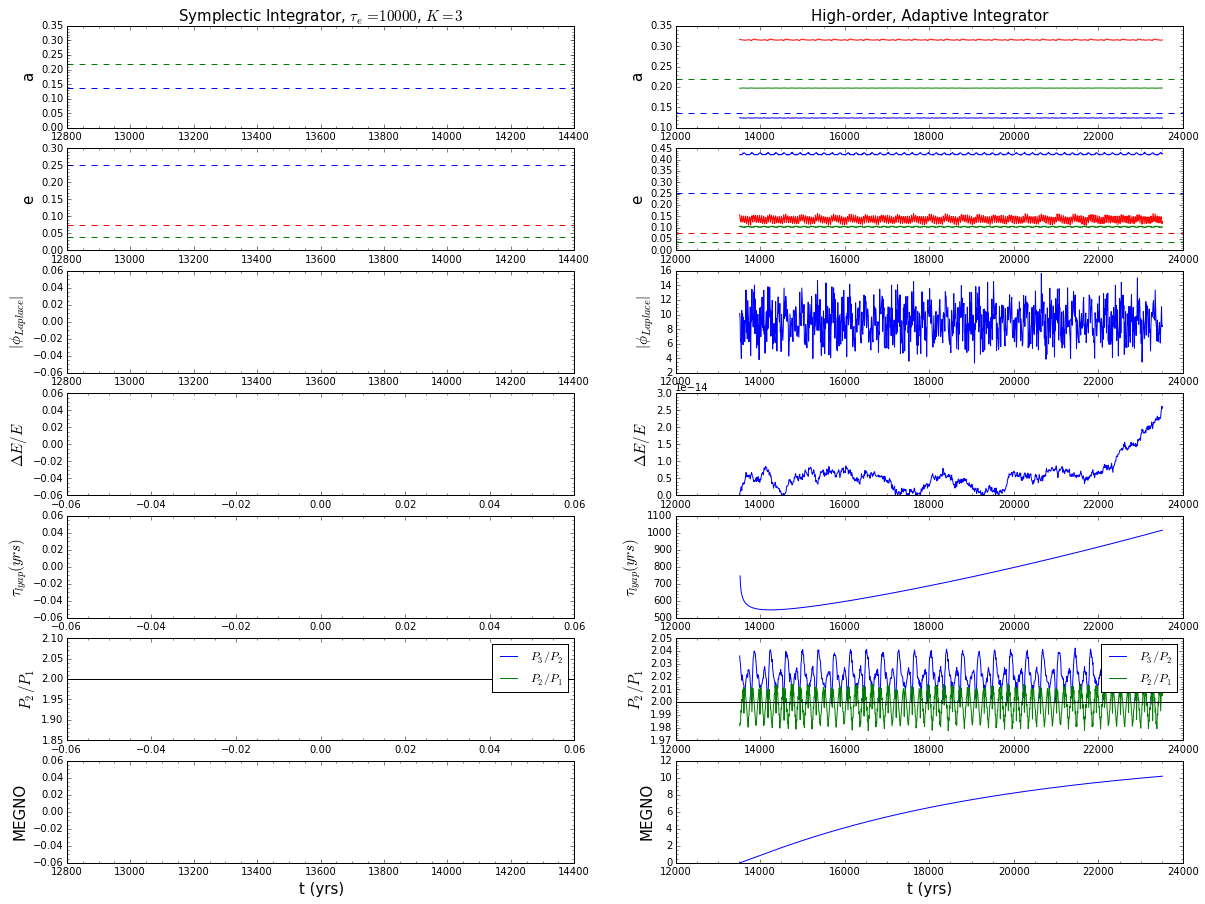

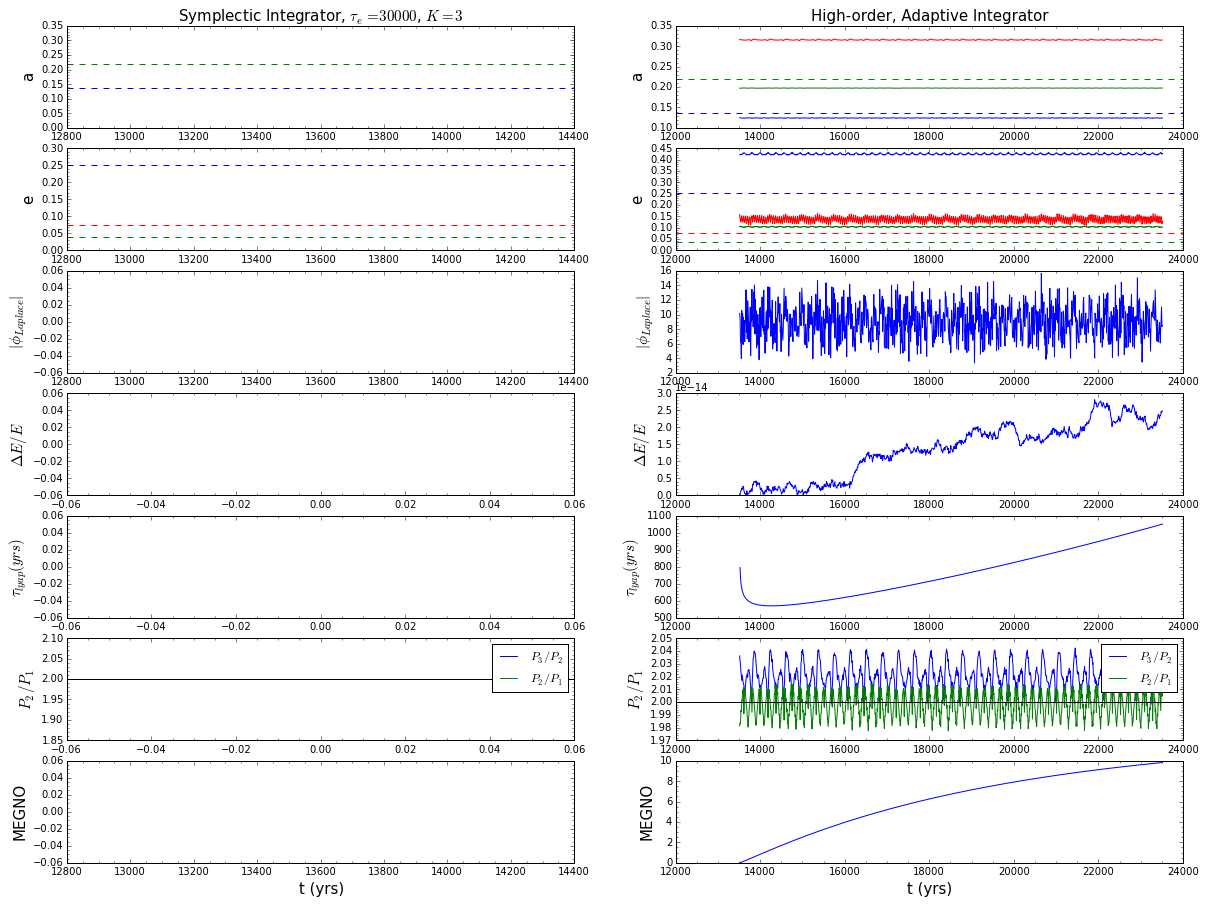

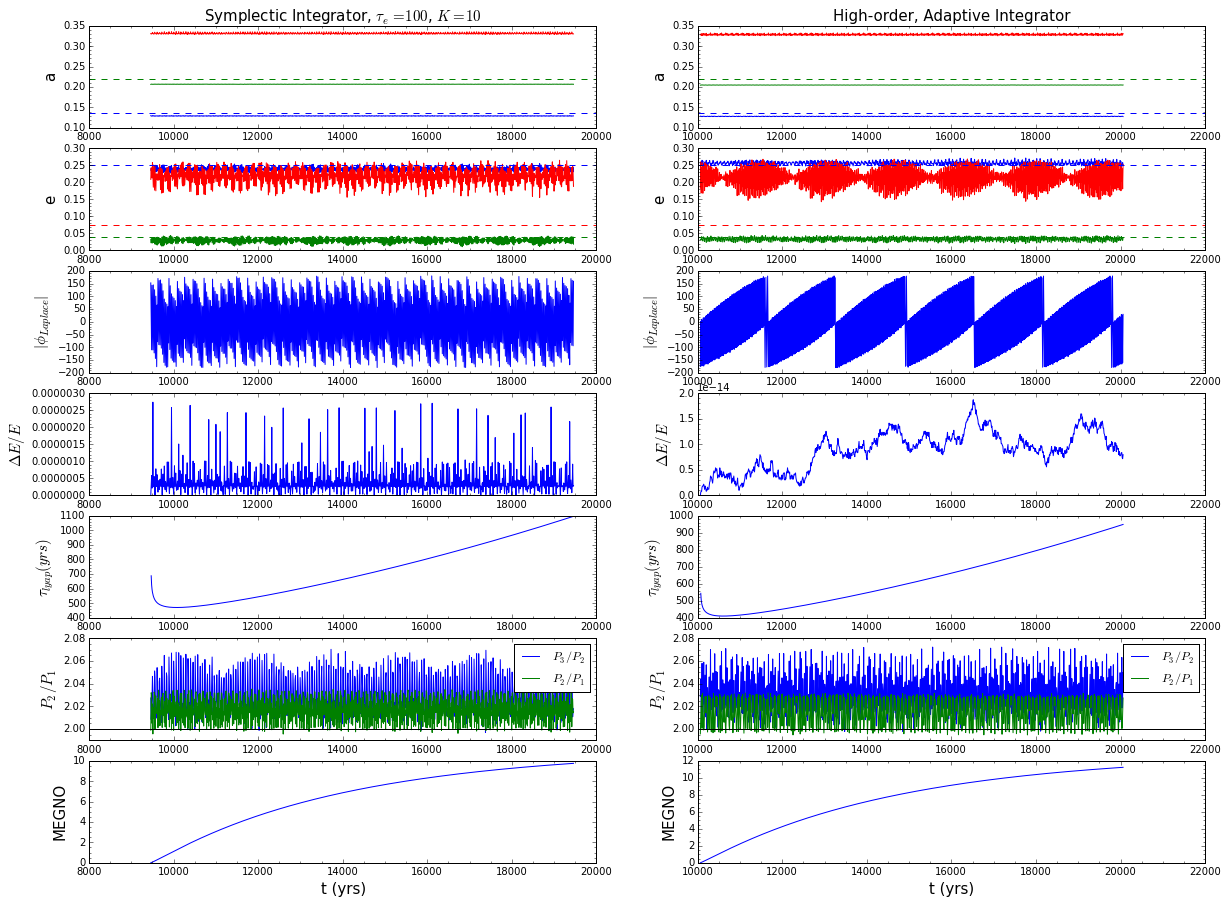

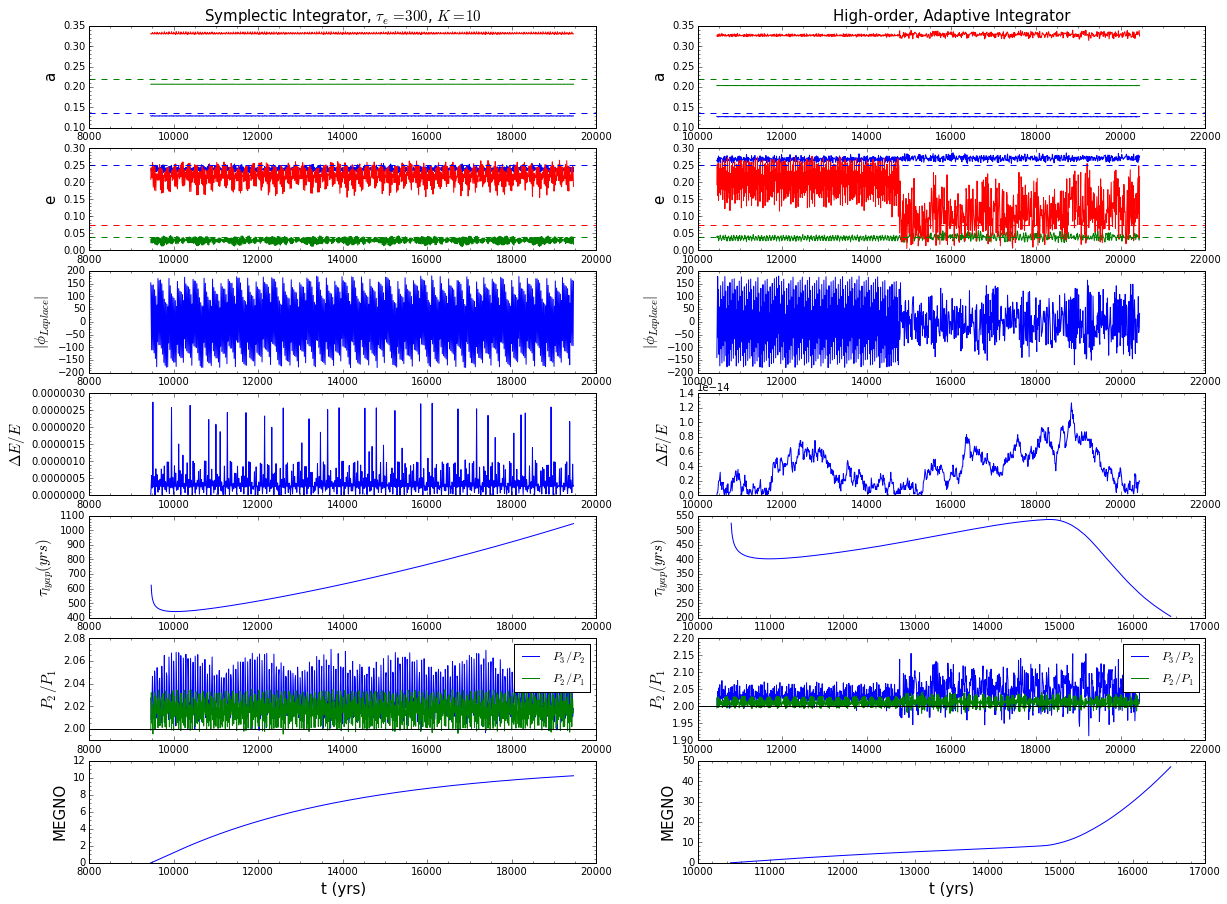

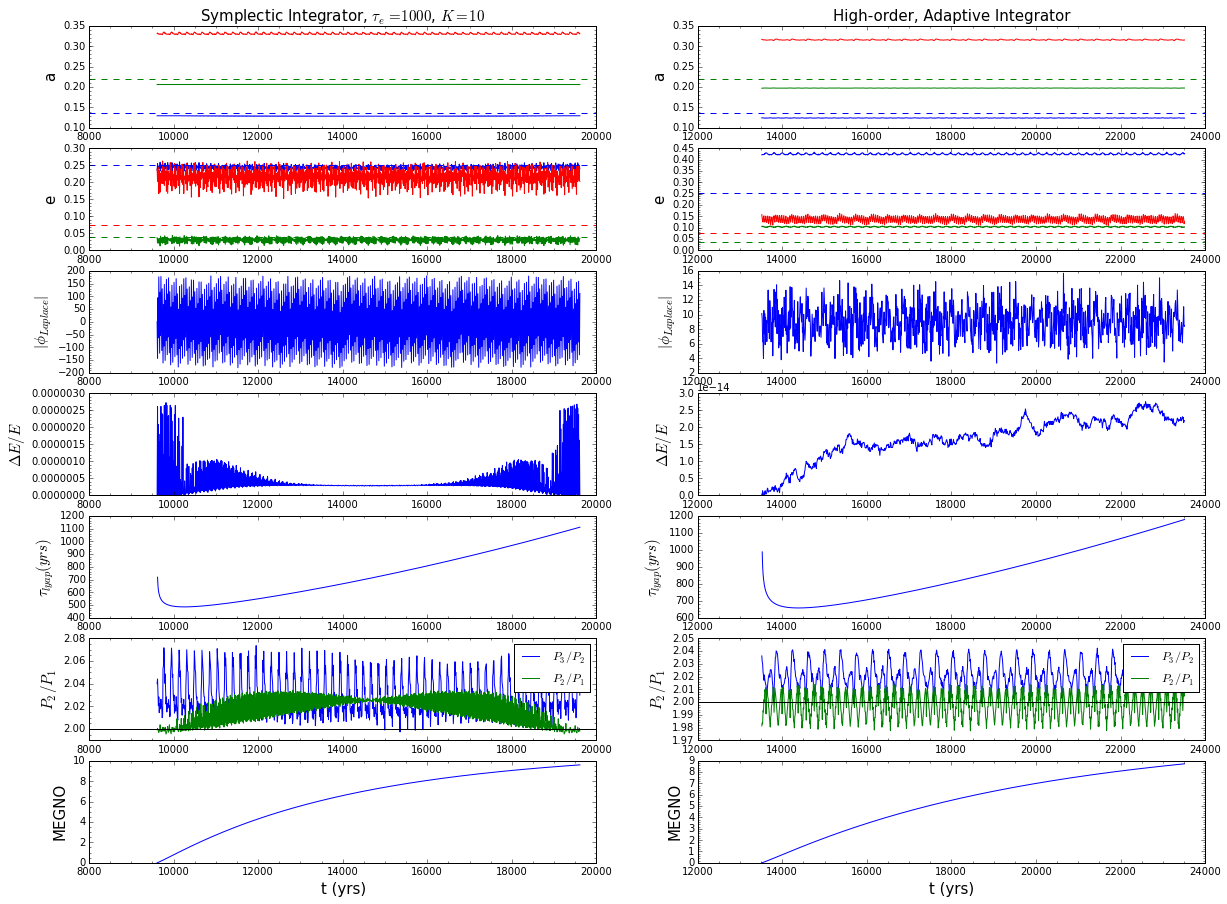

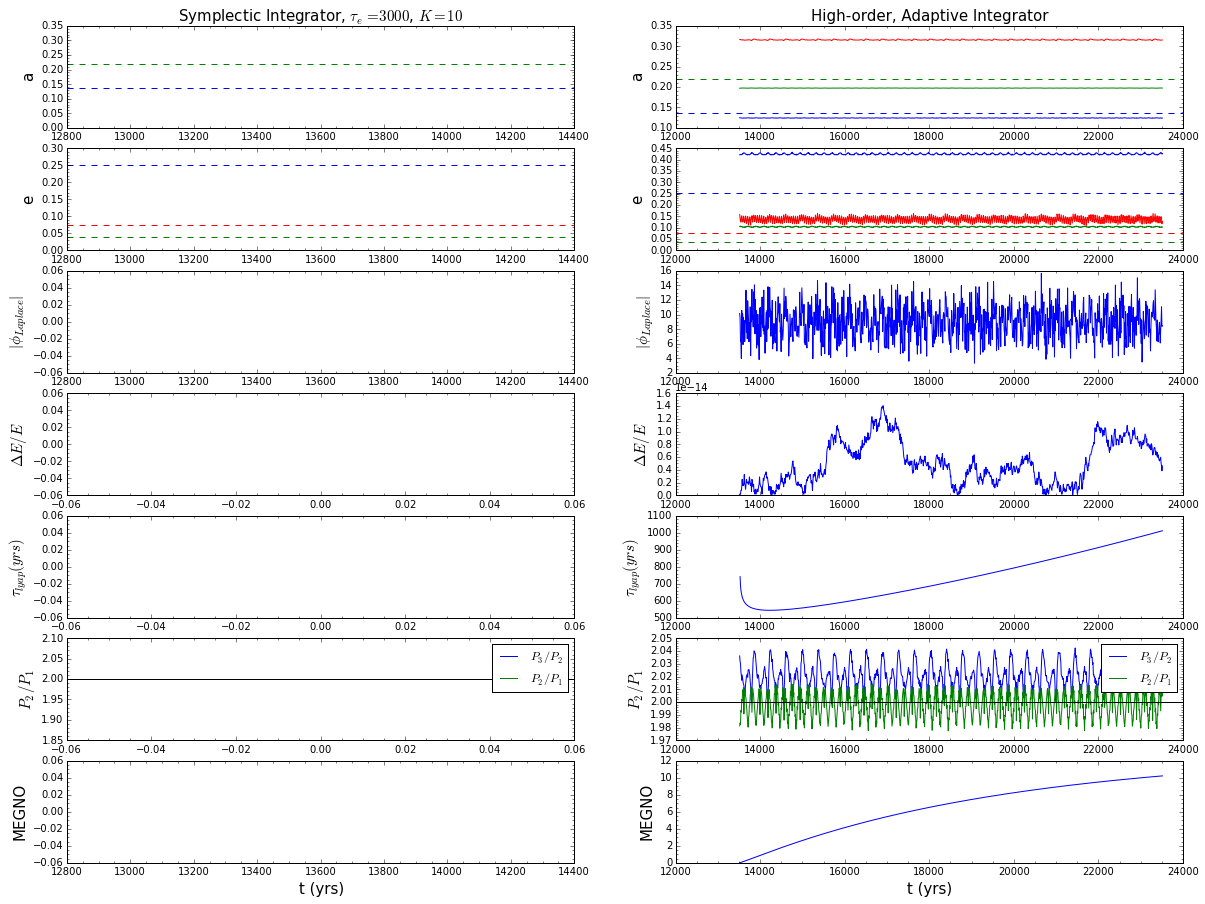

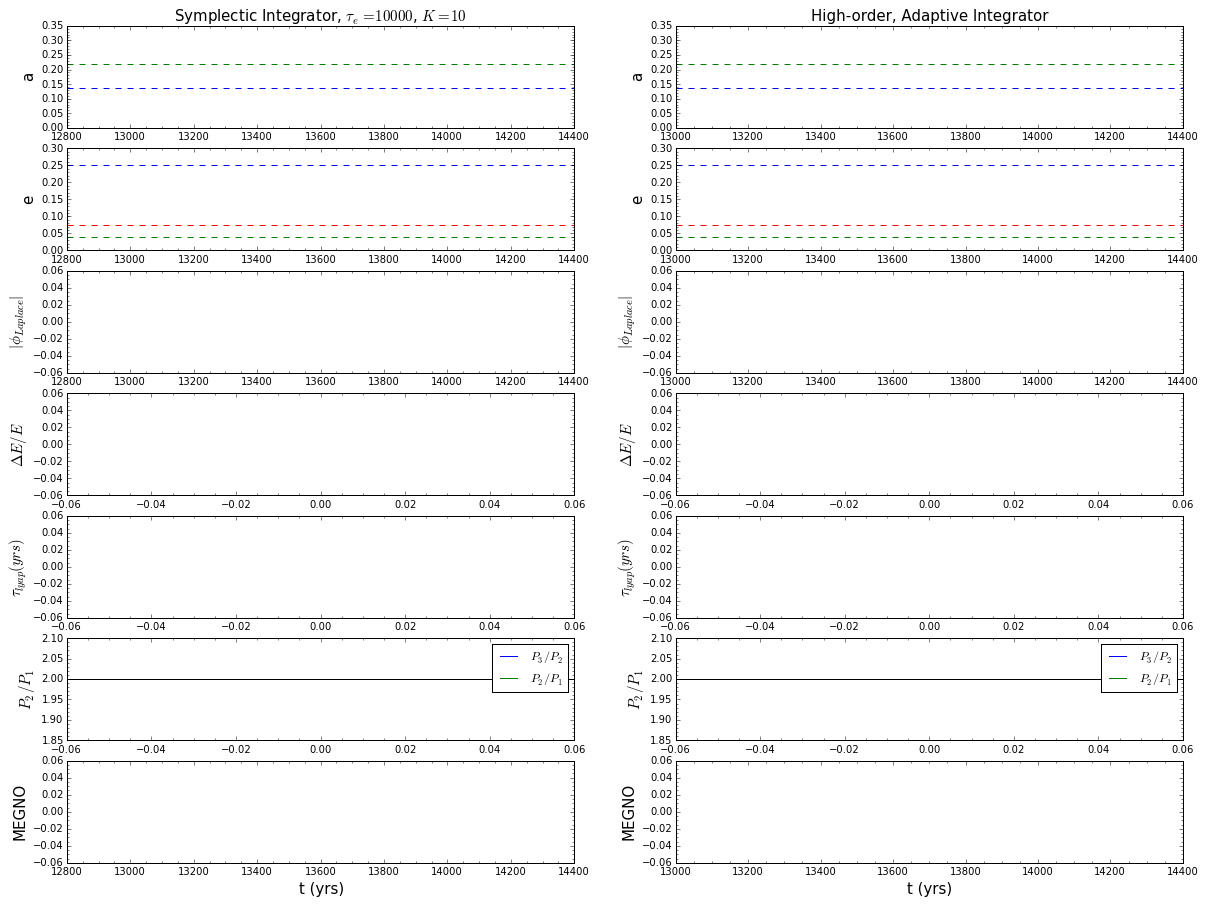

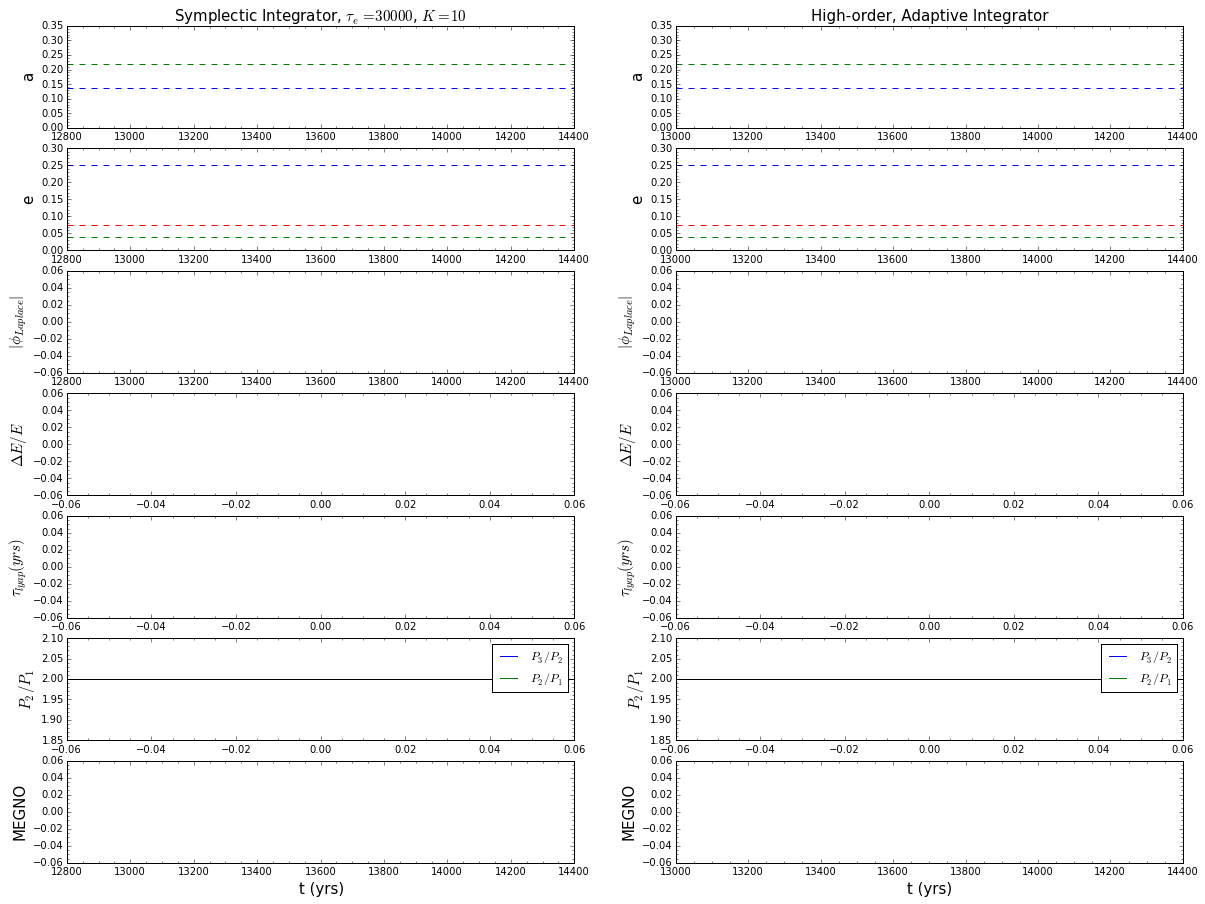

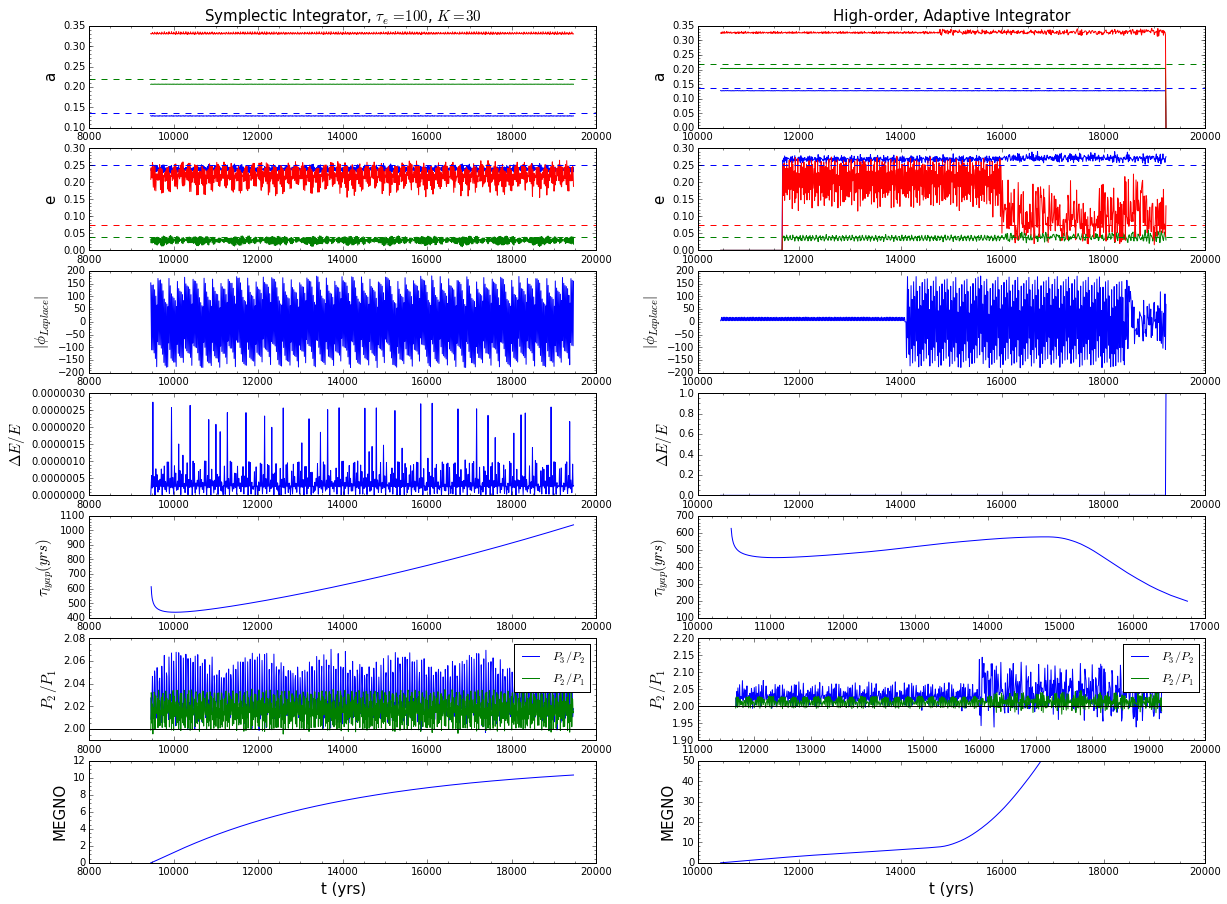

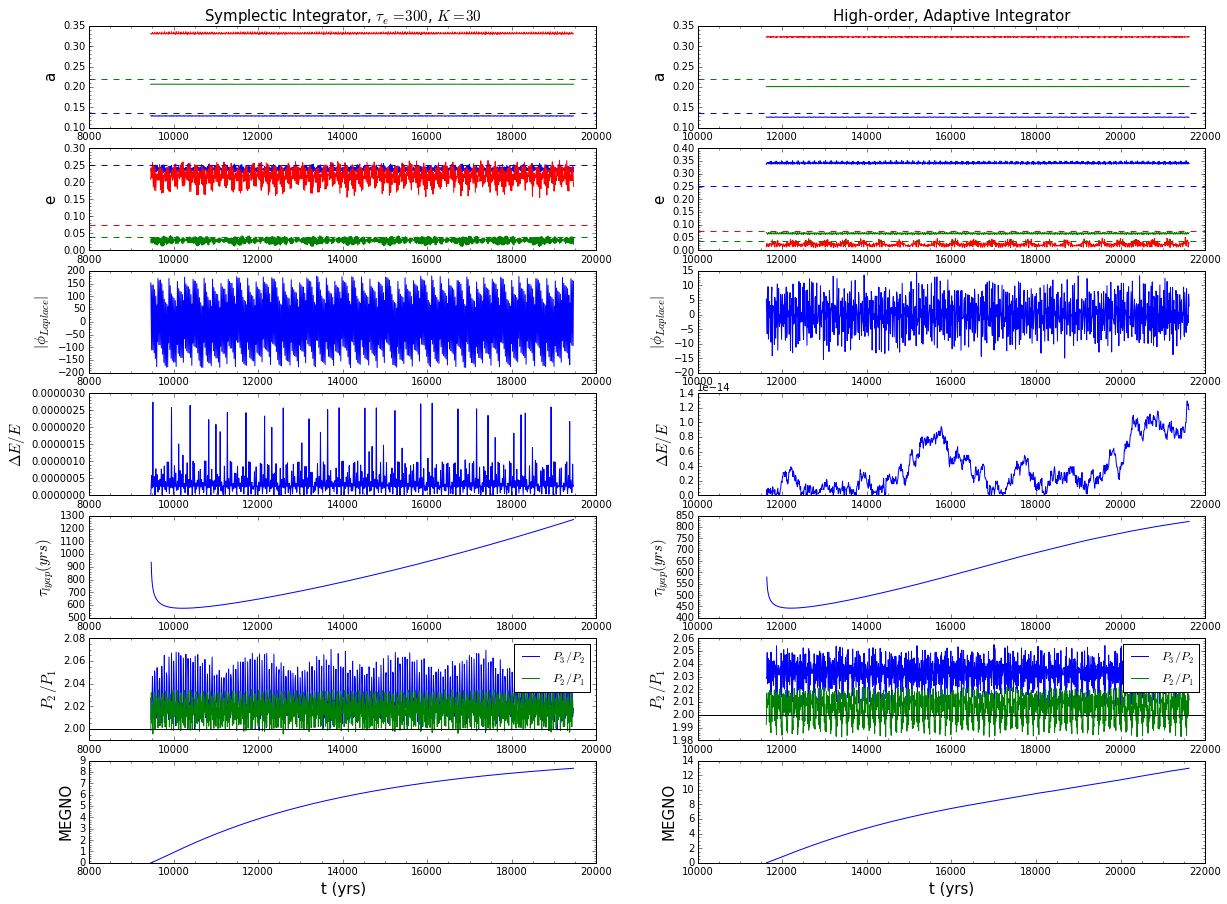

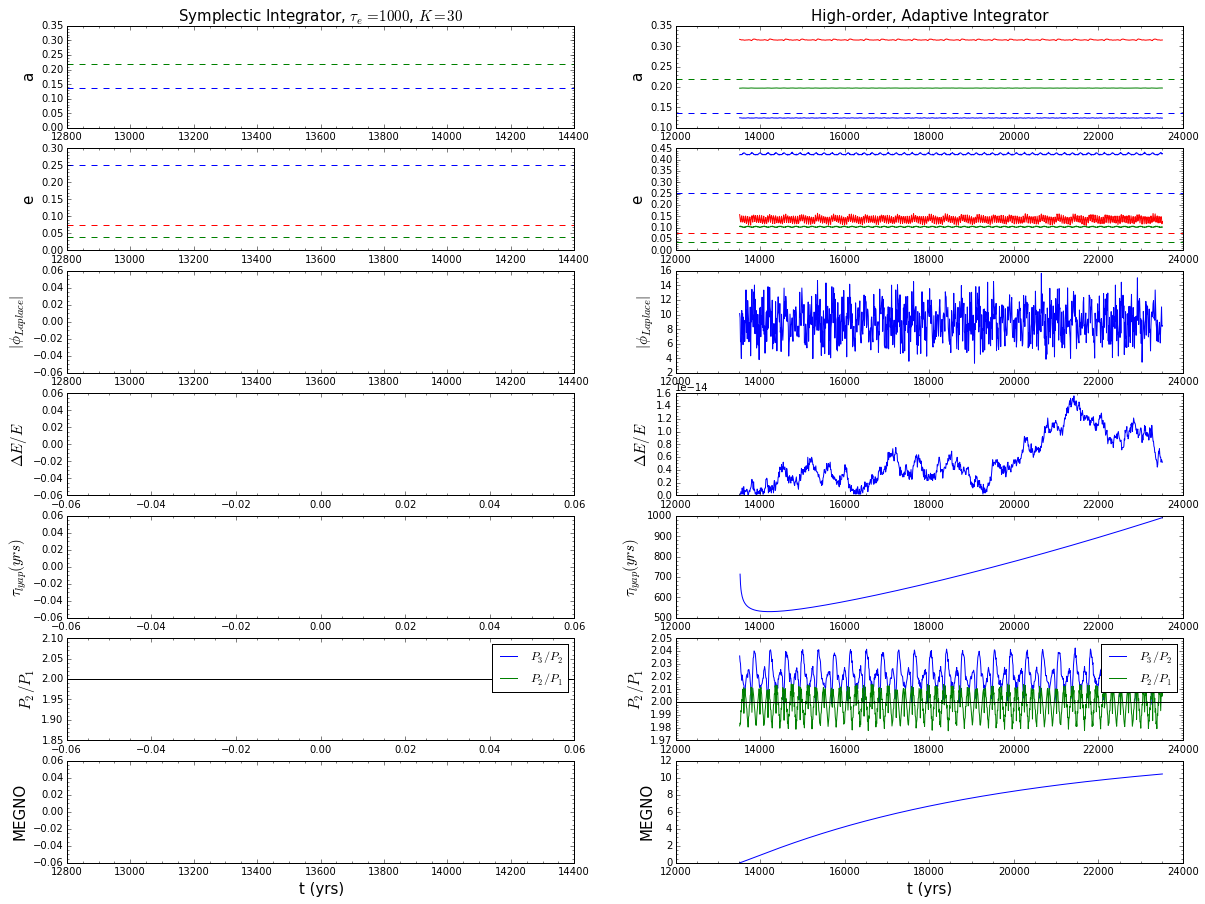

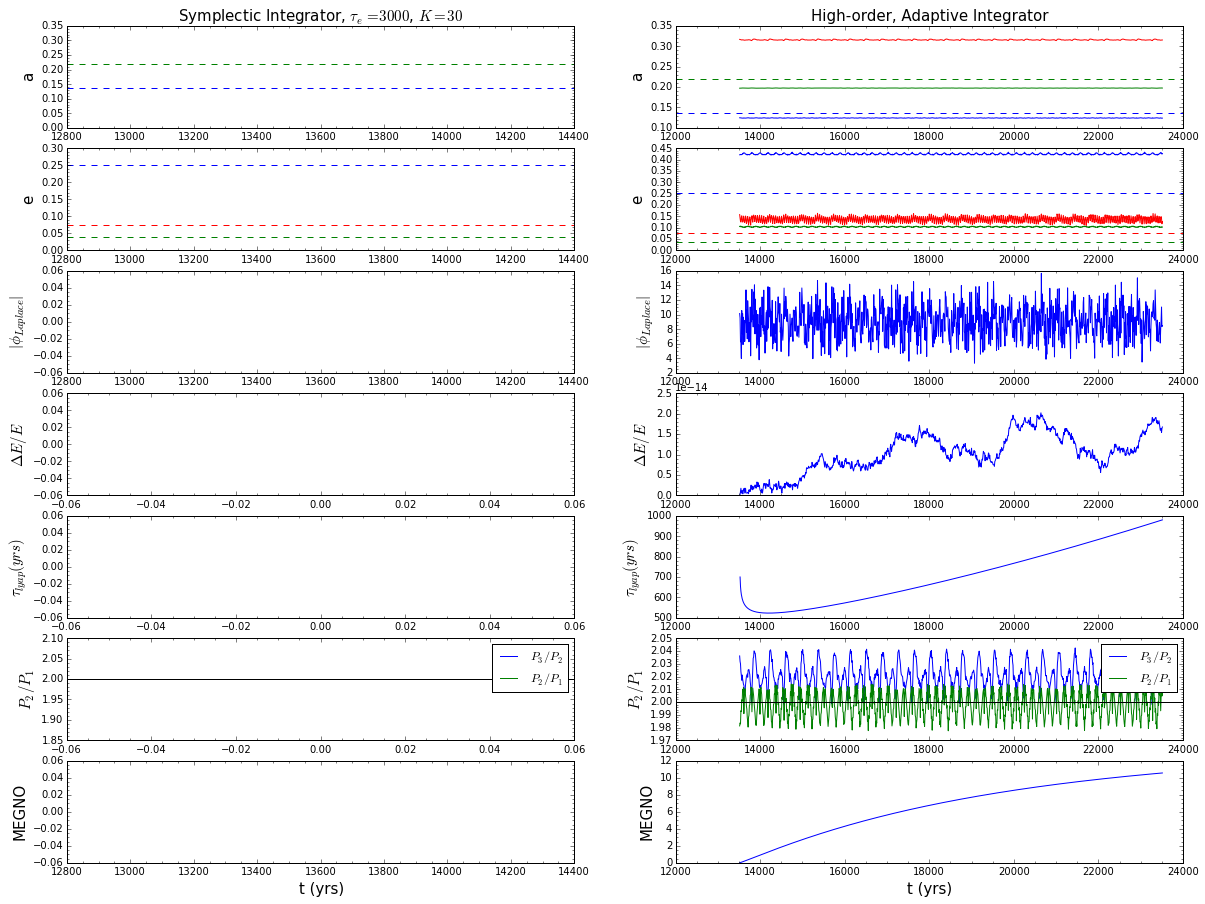

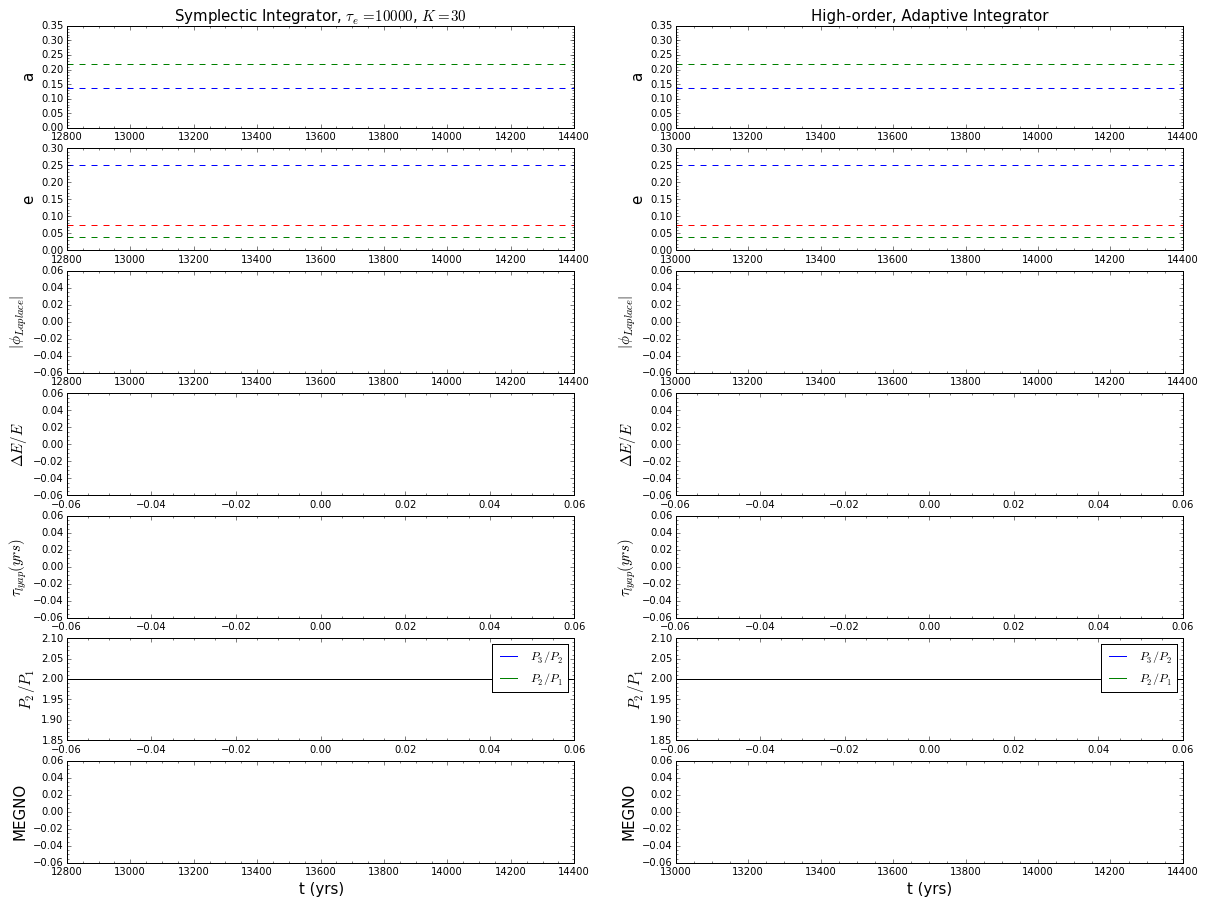

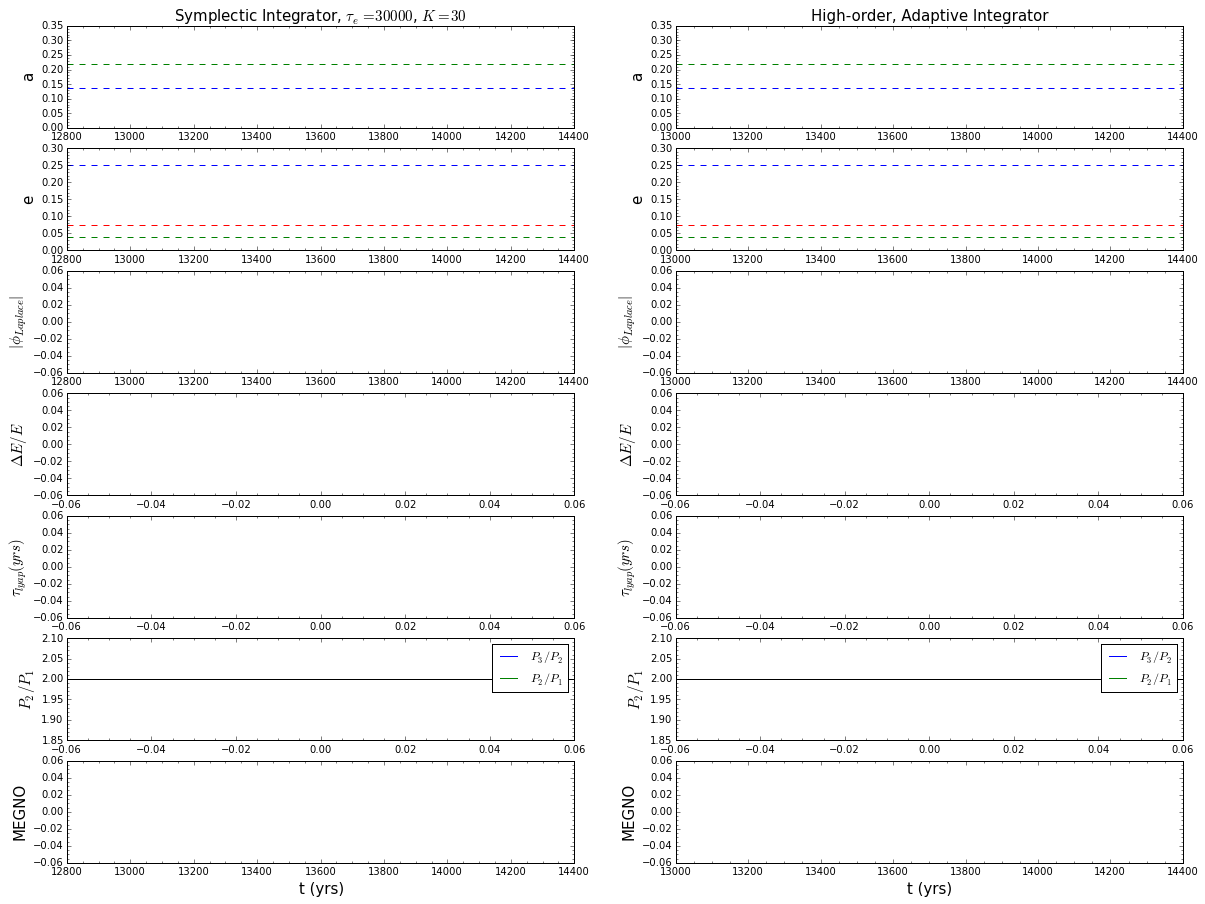

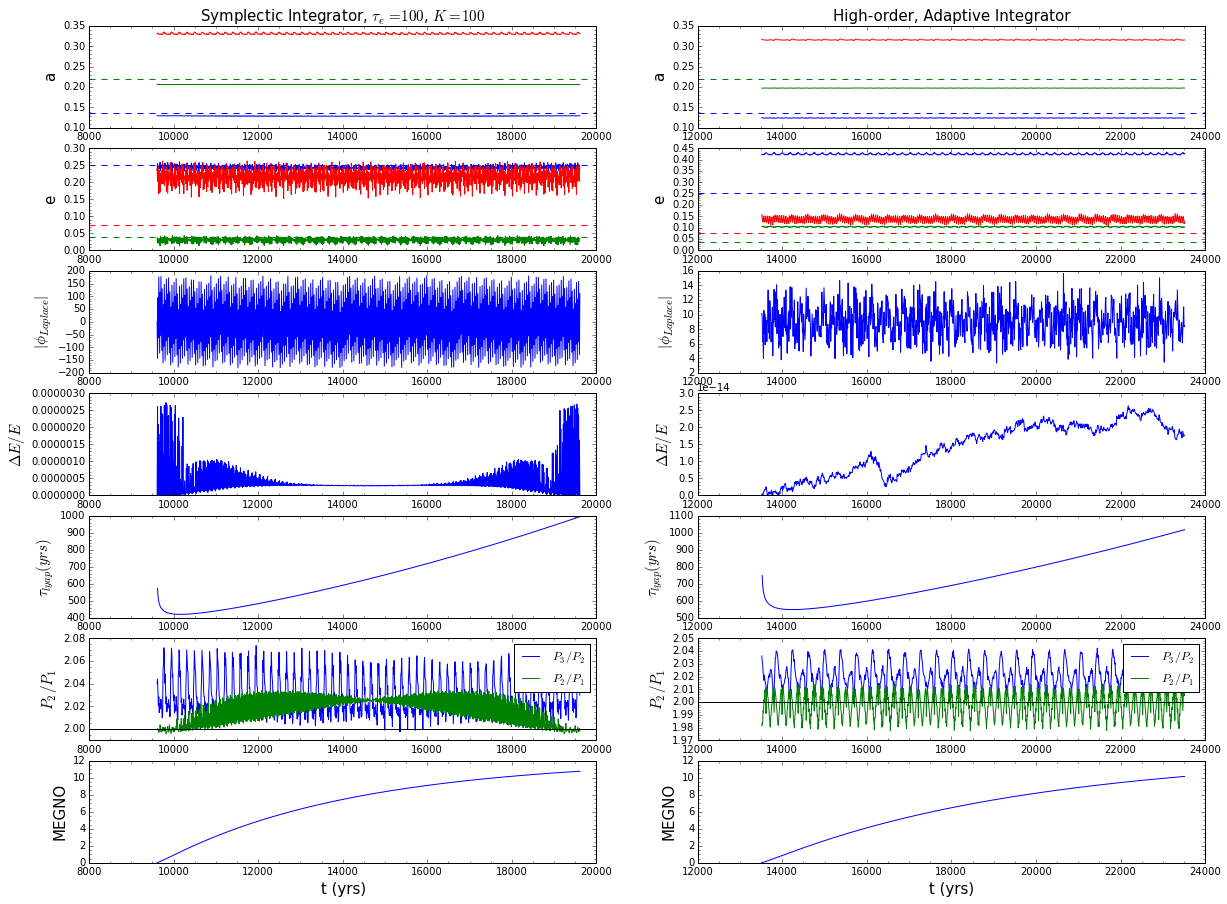

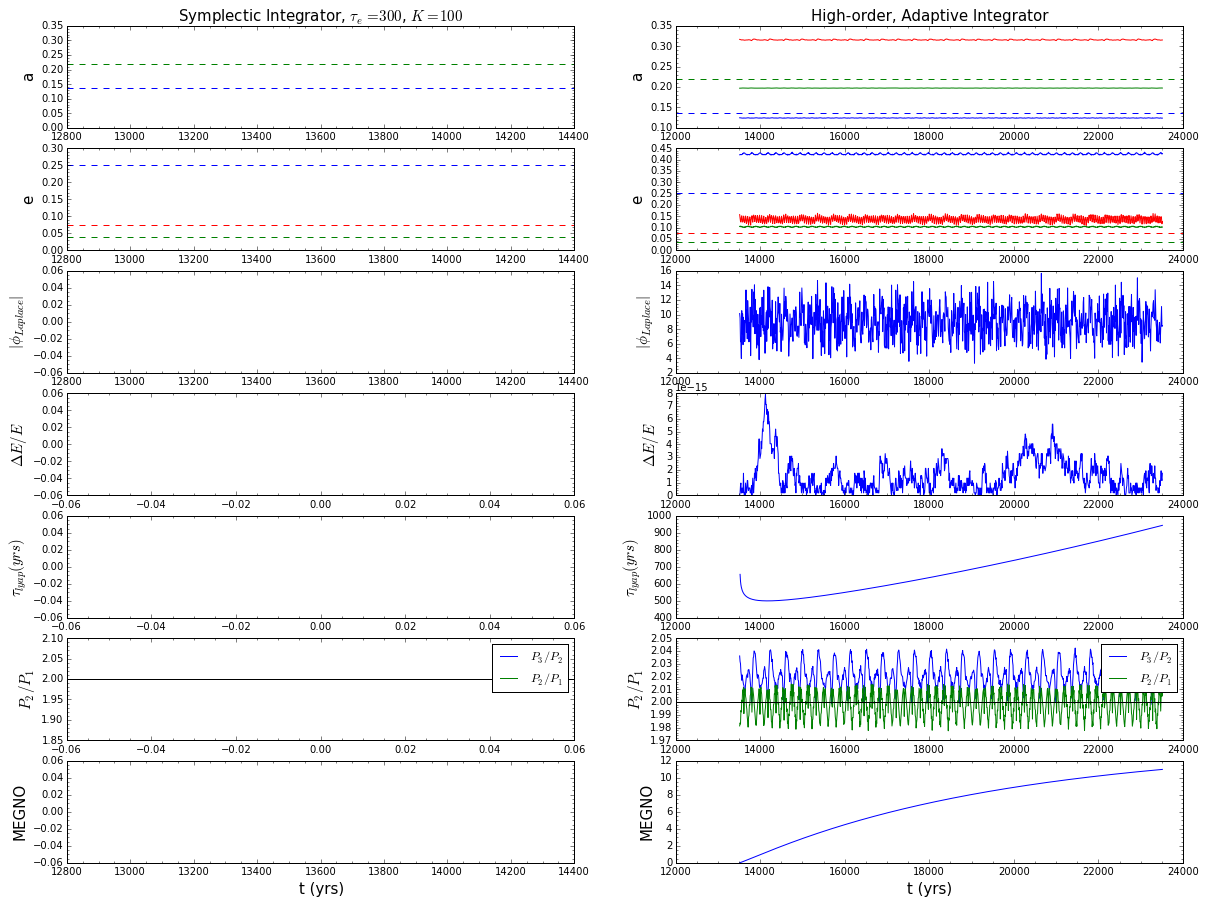

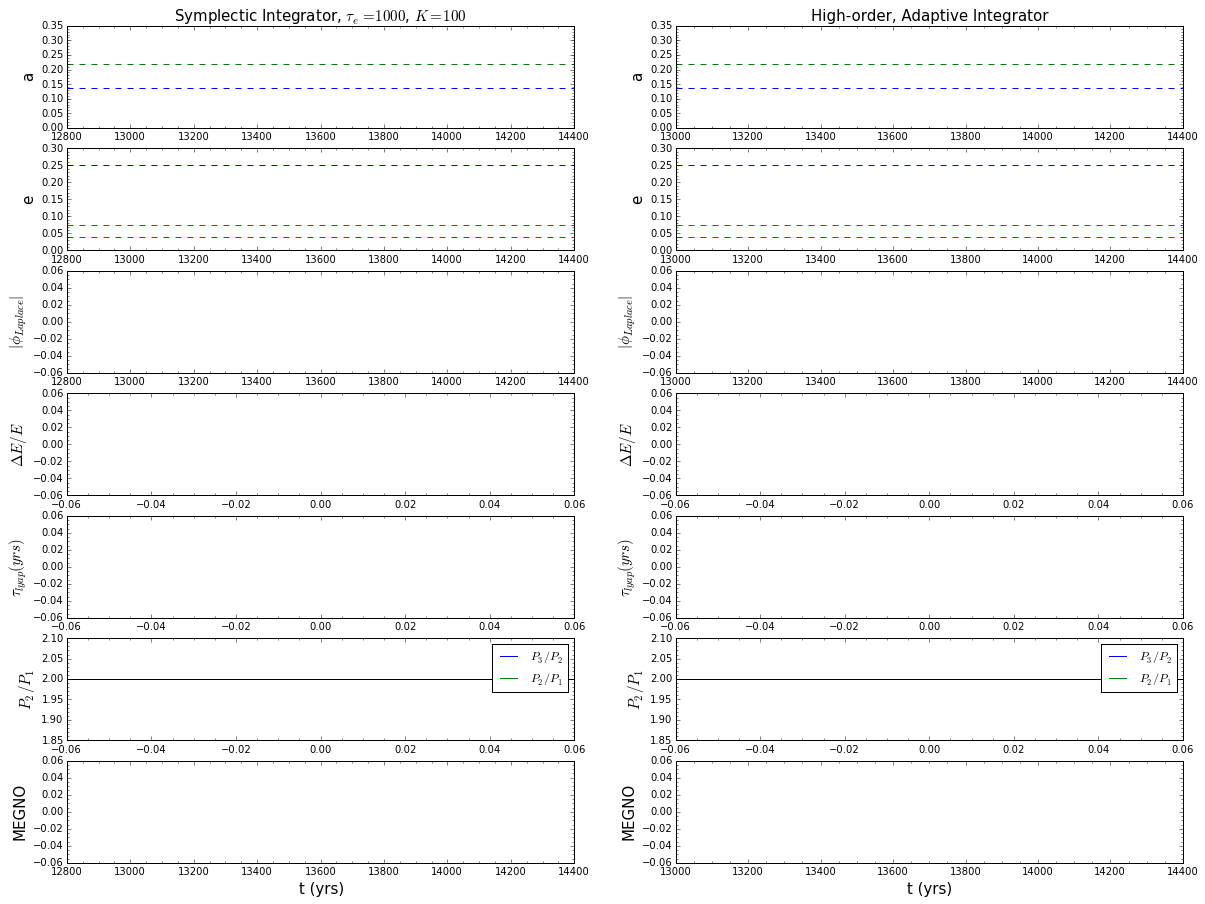

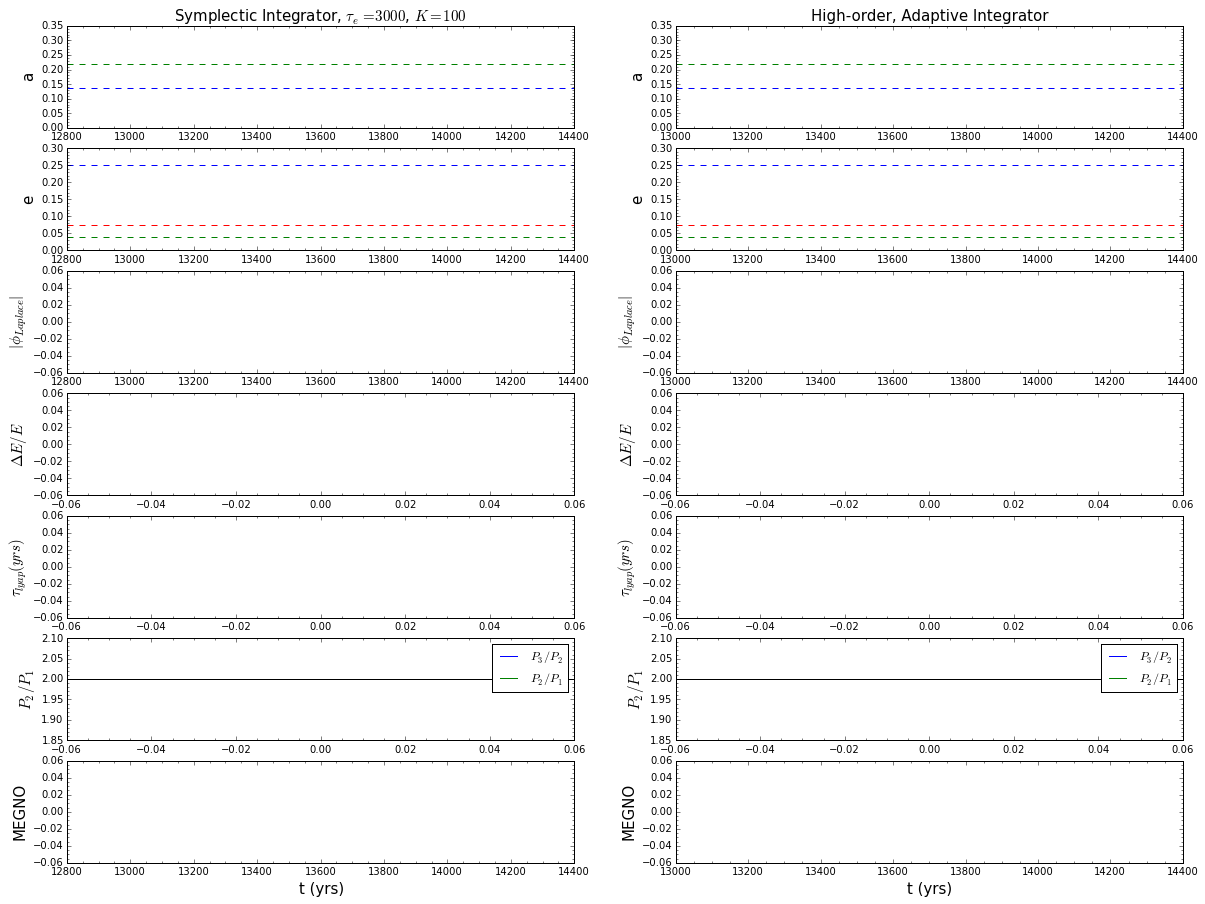

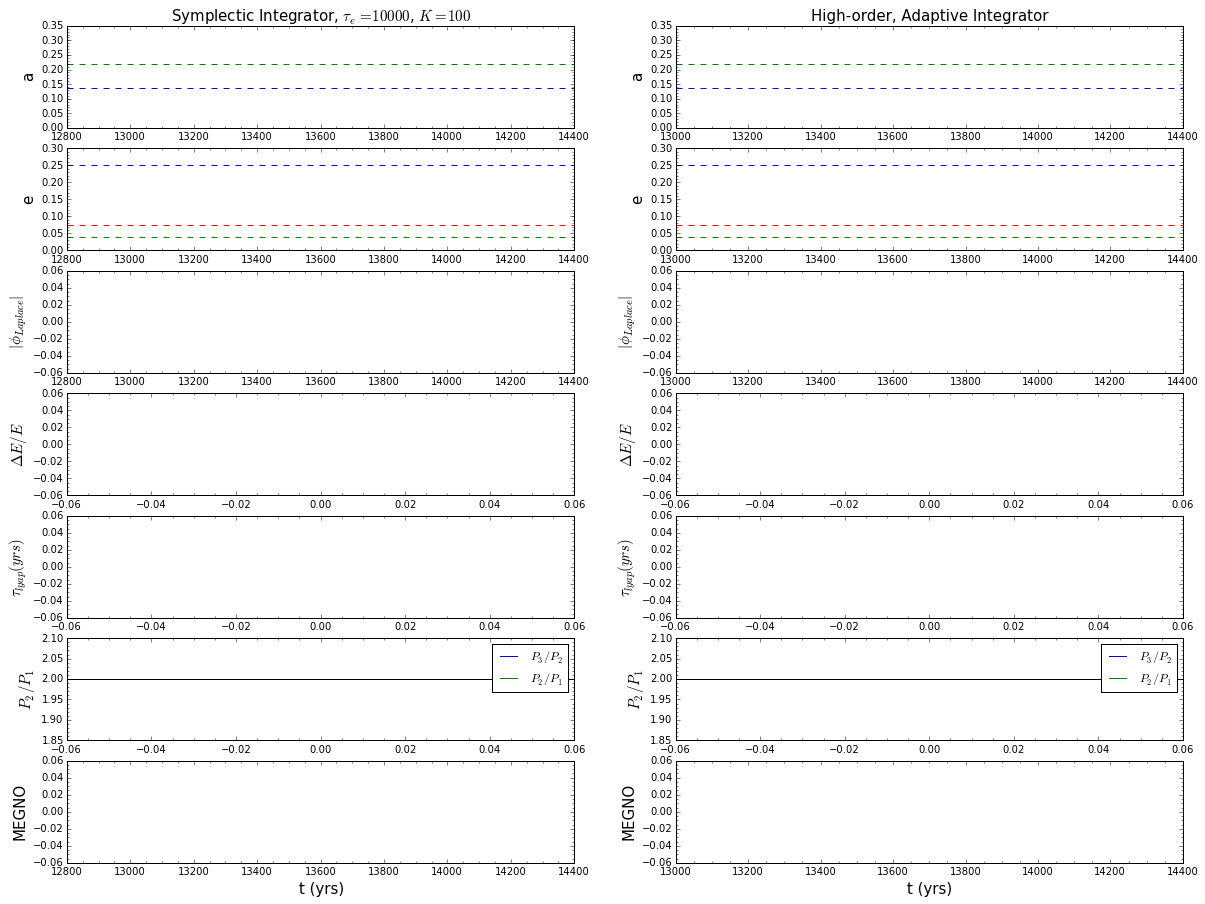

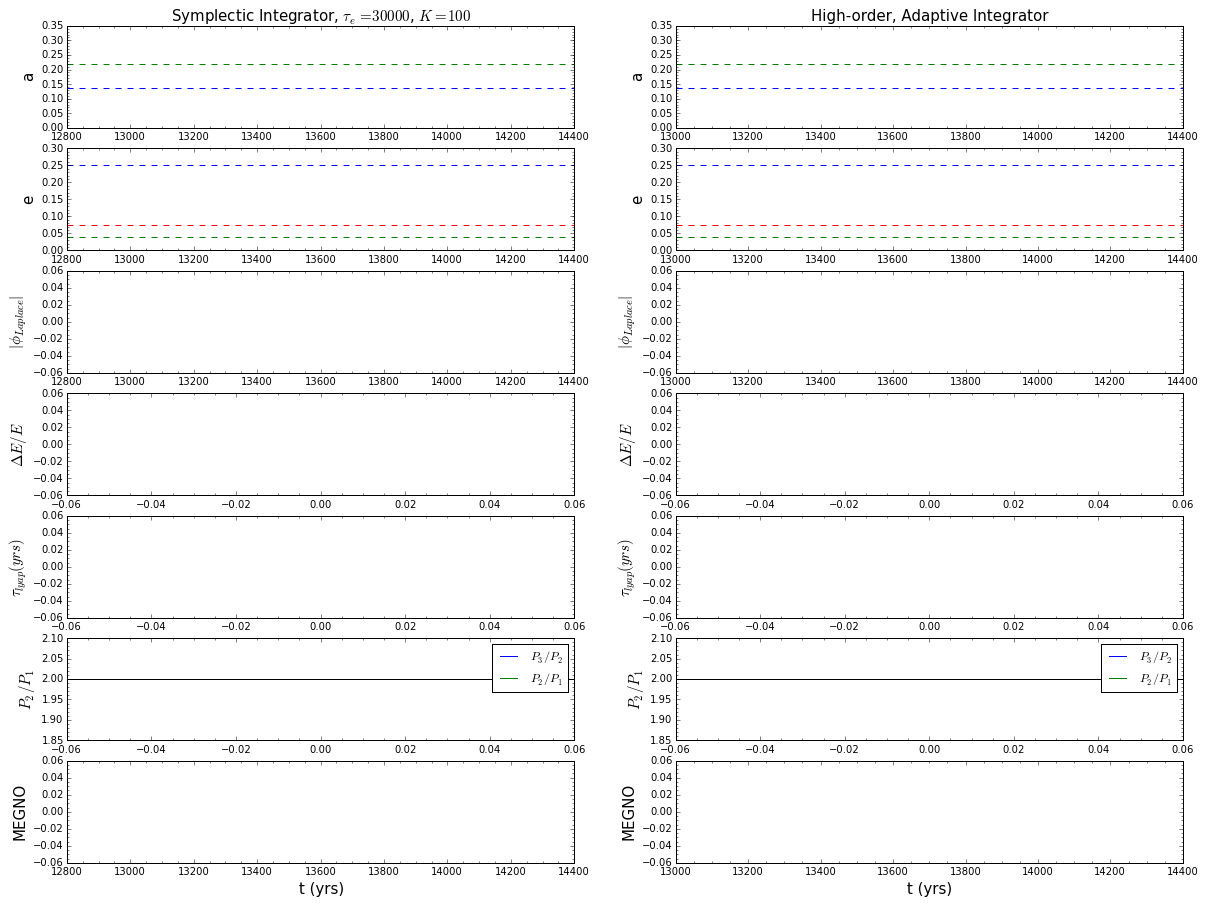

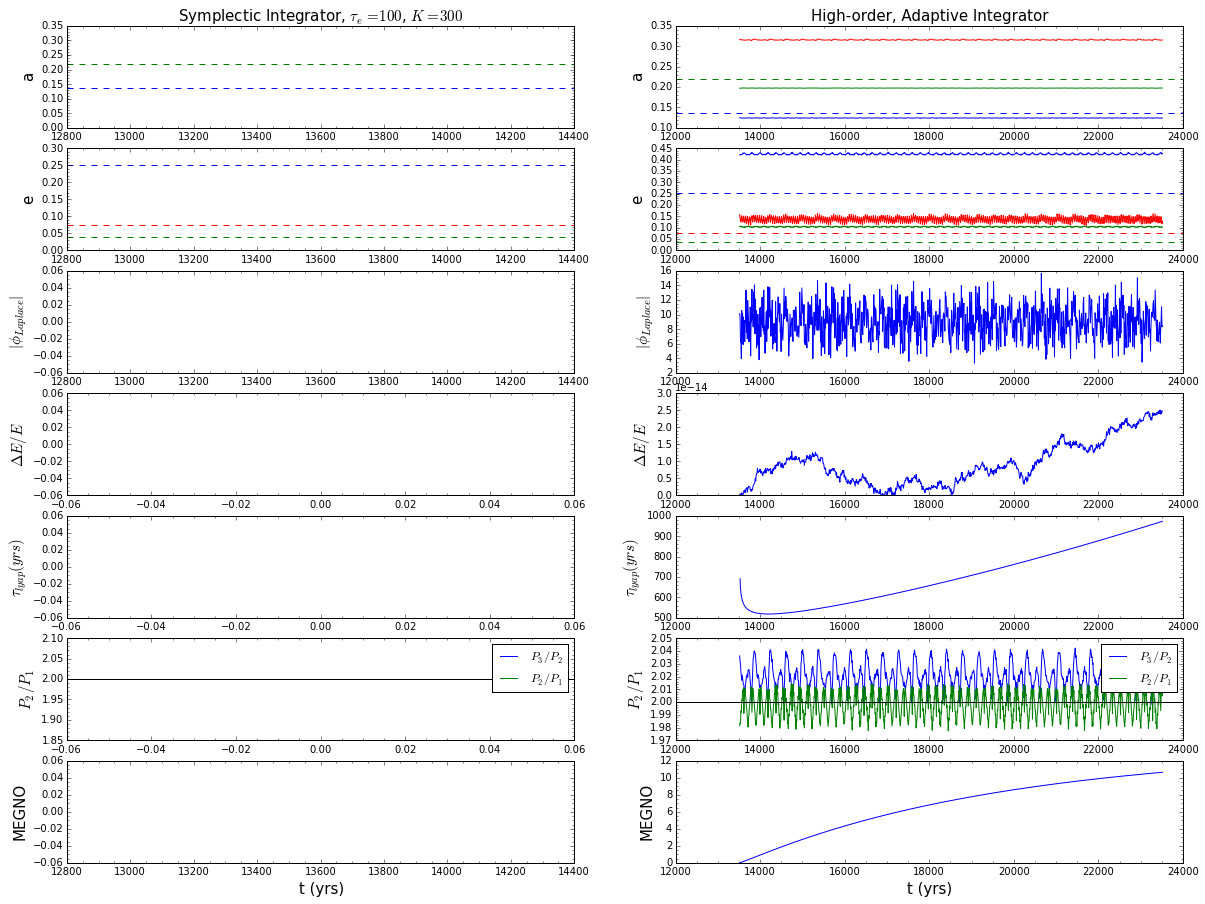

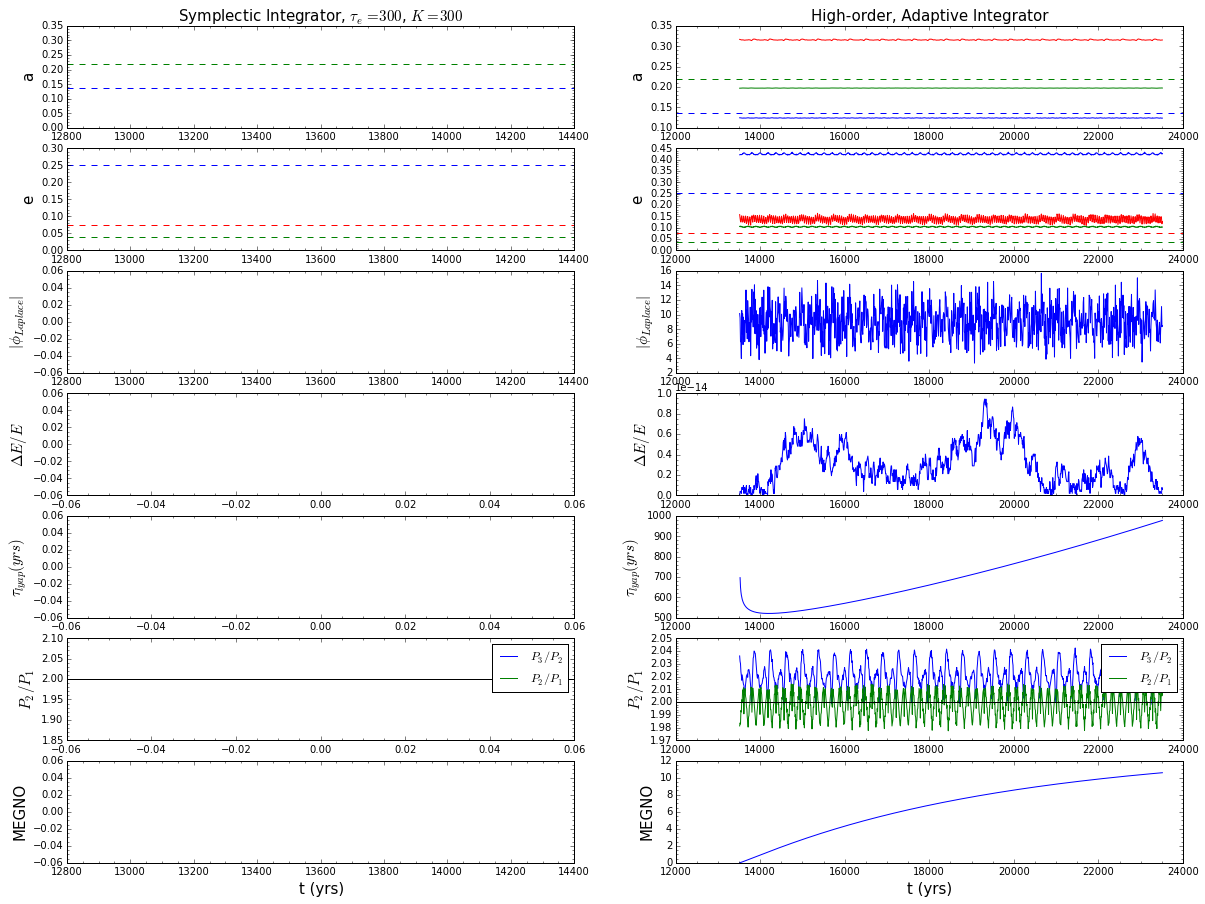

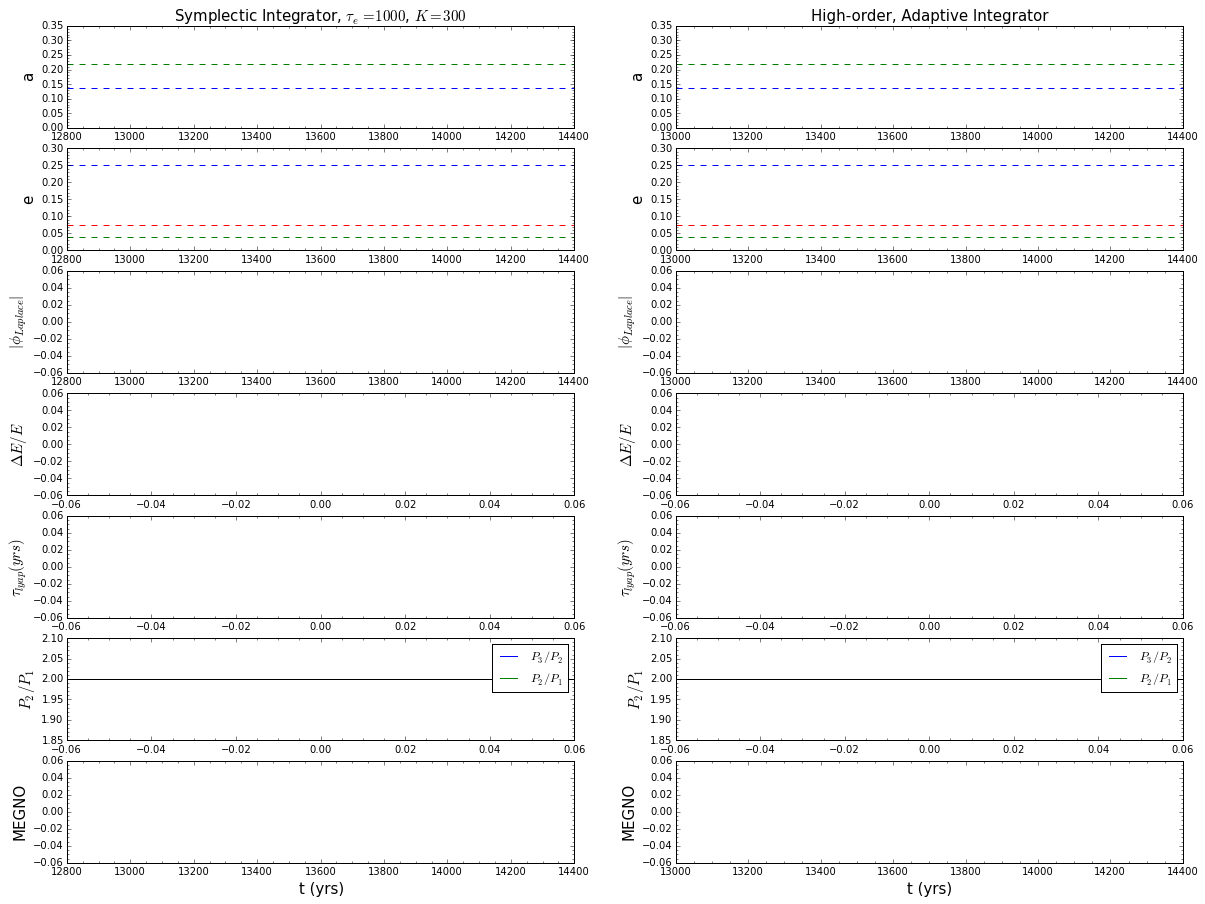

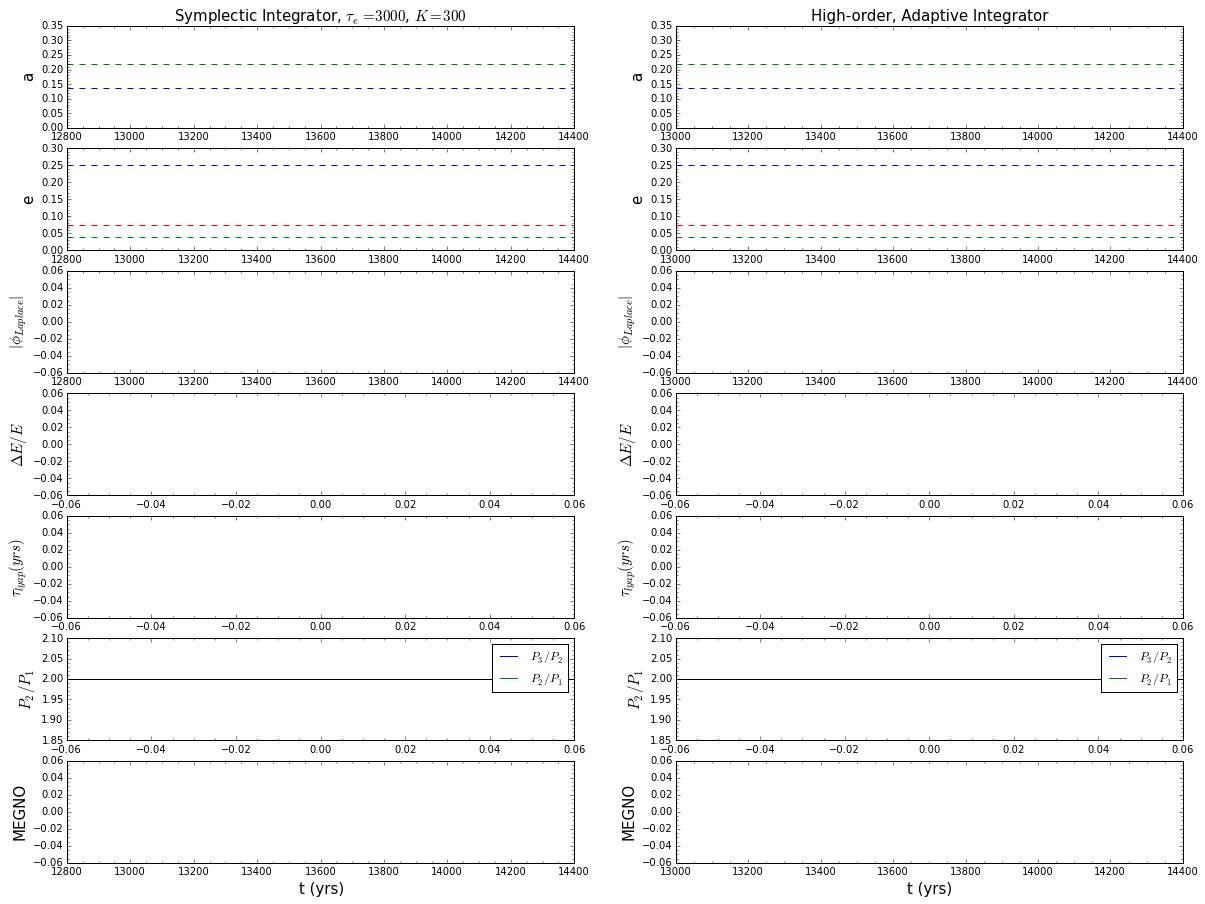

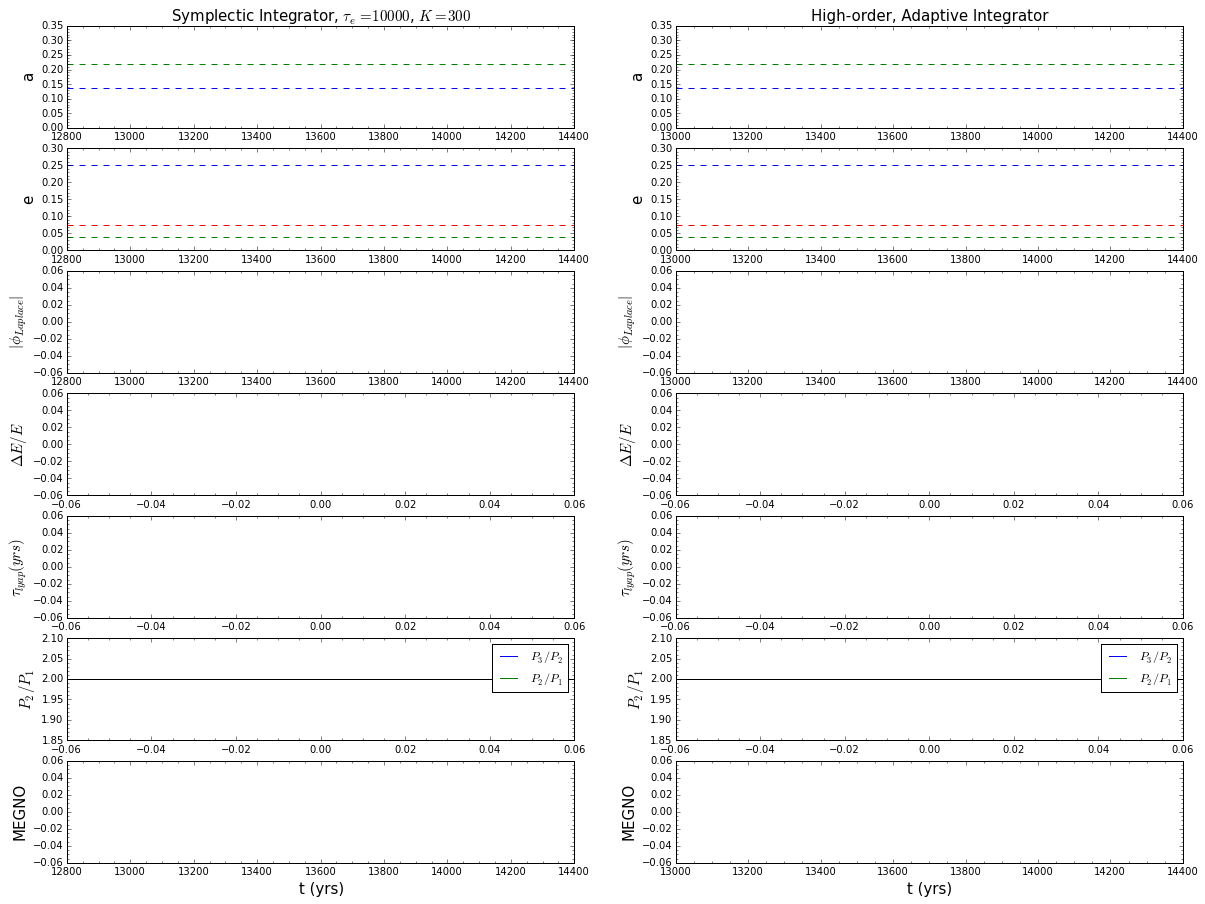

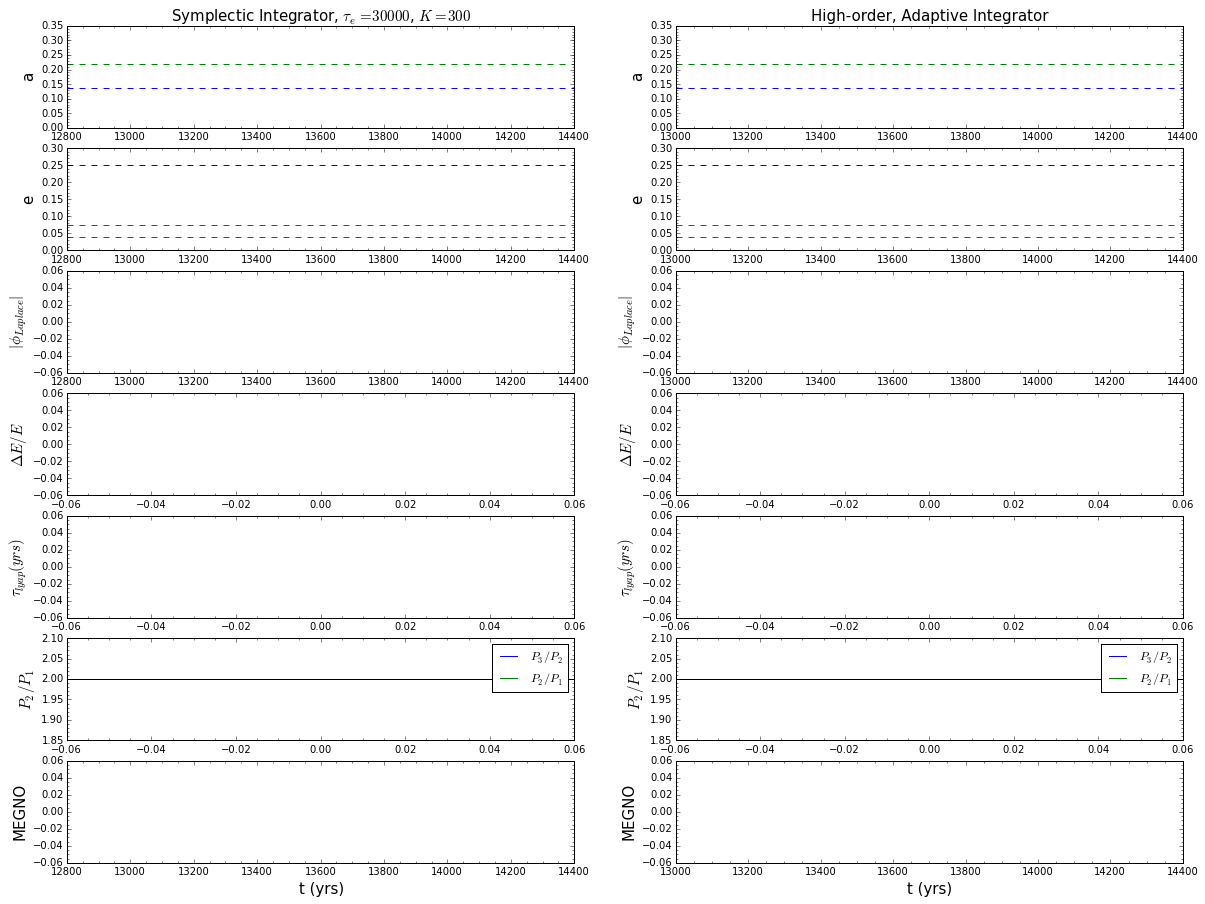

In [348]:
for f,g in zip(fname_list[::2],fname_list[1::2]):
    fig,axes=plt.subplots(7,2,figsize=(20,15))
    resw = Results(fromfile=f+'_b.dat')
    resw.plot(fig=fig,axes=axes[:,0])
    resi = Results(fromfile=g+'_b.dat')
    resi.plot(fig=fig,axes=axes[:,1])
    axes[0,0].set_title('Symplectic Integrator, $\\tau_e = %d$, $K=%d$'%(resw.tau_e,resw.K),fontsize=15)
    axes[0,1].set_title('High-order, Adaptive Integrator',fontsize=15)
    fig.savefig(f[:-2]+'.png')

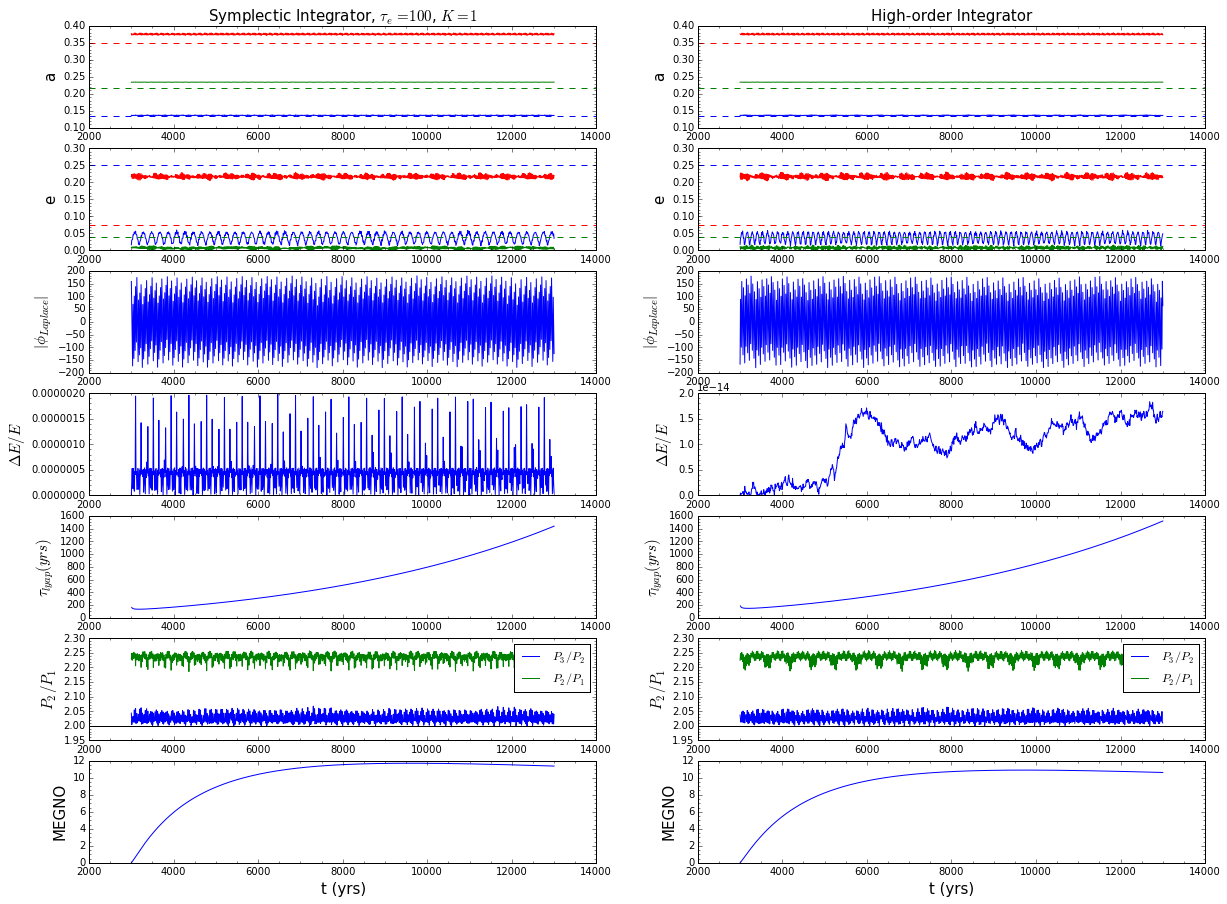

In [344]:
fig,axes=plt.subplots(7,2,figsize=(20,15))
resw = Results(fromfile=fname_list[0]+'_b.dat')
resw.plot(fig=fig,axes=axes[:,0])
resi = Results(fromfile=fname_list[1]+'_b.dat')
resi.plot(fig=fig,axes=axes[:,1])
axes[0,0].set_title('Symplectic Integrator, $\\tau_e = %d$, $K=%d$'%(resw.tau_e,resw.K),fontsize=15)
axes[0,1].set_title('High-order, Adaptive Integrator',fontsize=15)
fig.savefig('test.png')

In [347]:
for f,g in zip(fname_list[::2],fname_list[1::2]):
    print f,g

results/res_t100_k1_w results/res_t100_k1_i
results/res_t300_k1_w results/res_t300_k1_i
results/res_t1000_k1_w results/res_t1000_k1_i
results/res_t3000_k1_w results/res_t3000_k1_i
results/res_t10000_k1_w results/res_t10000_k1_i
results/res_t30000_k1_w results/res_t30000_k1_i
results/res_t100_k3_w results/res_t100_k3_i
results/res_t300_k3_w results/res_t300_k3_i
results/res_t1000_k3_w results/res_t1000_k3_i
results/res_t3000_k3_w results/res_t3000_k3_i
results/res_t10000_k3_w results/res_t10000_k3_i
results/res_t30000_k3_w results/res_t30000_k3_i
results/res_t100_k10_w results/res_t100_k10_i
results/res_t300_k10_w results/res_t300_k10_i
results/res_t1000_k10_w results/res_t1000_k10_i
results/res_t3000_k10_w results/res_t3000_k10_i
results/res_t10000_k10_w results/res_t10000_k10_i
results/res_t30000_k10_w results/res_t30000_k10_i
results/res_t100_k30_w results/res_t100_k30_i
results/res_t300_k30_w results/res_t300_k30_i
results/res_t1000_k30_w results/res_t1000_k30_i
results/res_t3000_k3